<a href="https://colab.research.google.com/github/andrniko/Various-Projects/blob/master/Corona_Stats_Austria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, a overview of the coronavirus situation in Austria will be presented. All of the data will be used can be found on GitHub and freely used.



In [96]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250

In [97]:

url='https://raw.githubusercontent.com/Daniel-Breuss/covid-data-austria/master/austriadata.csv'

Firstly, let us inspect what kind of information does the data give us. To do so one must first convert it ino a pandas dataframe.


In [98]:
import pandas as pd
df=pd.read_csv(url,sep=',')
print(df.columns)
print(df.head())

Index(['Datum', 'Fälle_gesamt', 'Fälle_Zuwachs', 'Tote_v1', 'Tote_v1_Zuwachs',
       'Tote_v2', 'Tote_v2_Zuwachs', 'Genesene', 'Genesene_Zuwachs',
       'Hospitalisiert', 'Intensivstation', 'IBett_frei', 'IBett_Kapazität',
       'Testungen', 'Testungen_Zuwachs', 'Burgenland', 'Burgenland_Tote',
       'Burgenland_Genesene', 'Burgenland_Spital', 'Burgenland_Intensiv',
       'Burgenland_Tests', 'Kärnten', 'Kärnten_Tote', 'Kärnten_Genesene',
       'Kärnten_Spital', 'Kärnten_Intensiv', 'Kärnten_Tests',
       'Niederösterreich', 'Niederösterreich_Tote',
       'Niederösterreich_Genesene', 'Niederösterreich_Spital',
       'Niederösterreich_Intensiv', 'Niederösterreich_Tests', 'Oberösterreich',
       'Oberösterreich_Tote', 'Oberösterreich_Genesene',
       'Oberösterreich_Spital', 'Oberösterreich_Intensiv',
       'Oberösterreich_Tests', 'Salzburg', 'Salzburg_Tote',
       'Salzburg_Genesene', 'Salzburg_Spital', 'Salzburg_Intensiv',
       'Salzburg_Tests', 'Steiermark', 'Steiermark_T

The data is various and many in category and detail. However, it seems that new data gets imported on the top, we must first flip it, upside down. 


In [99]:
df=df.iloc[::-1]
df.set_index('Datum',inplace=True)
print(df)

            Fälle_gesamt  Fälle_Zuwachs  ...  Wien_Intensiv  Wien_Tests
Datum                                    ...                           
2020-02-25             2              2  ...              0           0
2020-02-26             2              0  ...              0           0
2020-02-27             3              1  ...              0           0
2020-02-28             5              2  ...              0           0
2020-02-29             7              2  ...              0           0
...                  ...            ...  ...            ...         ...
2020-10-28         91692           3946  ...             76      609294
2020-10-29         96200           4508  ...             82      615270
2020-10-30        101443           5243  ...             86      621446
2020-10-31        106584           5141  ...             87      627158
2020-11-01        111110           4526  ...             81      635130

[251 rows x 68 columns]


To remove the dates, as they are confusing, one ought to replace them with days since first confirmed case, as it seems to be canon to do so. 


In [100]:
 
df['Tage']=0
for i in range(len(df)):
  df['Tage'][i]=i
print(df.head())

            Fälle_gesamt  Fälle_Zuwachs  ...  Wien_Tests  Tage
Datum                                    ...                  
2020-02-25             2              2  ...           0     0
2020-02-26             2              0  ...           0     1
2020-02-27             3              1  ...           0     2
2020-02-28             5              2  ...           0     3
2020-02-29             7              2  ...           0     4

[5 rows x 69 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


The time has come to make the first plot. 

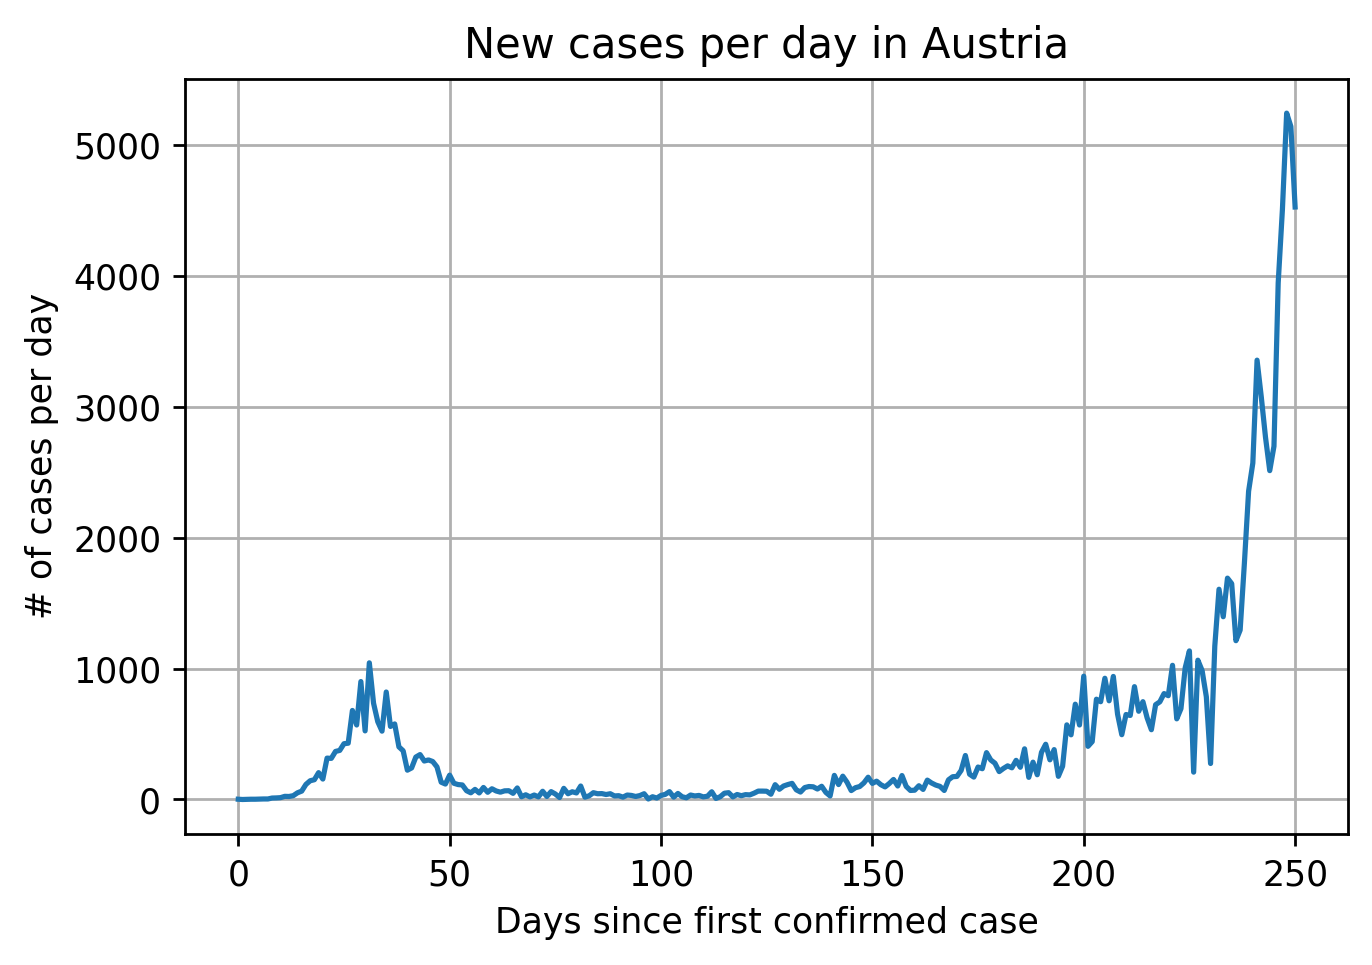

In [148]:
import matplotlib.pyplot as plt
 
plt.plot(df['Tage'],df['Fälle_Zuwachs'])
plt.title('New cases per day in Austria')
plt.xlabel('Days since first confirmed case')
plt.ylabel('# of cases per day')
plt.grid(which='both',axis='both')
plt.show()

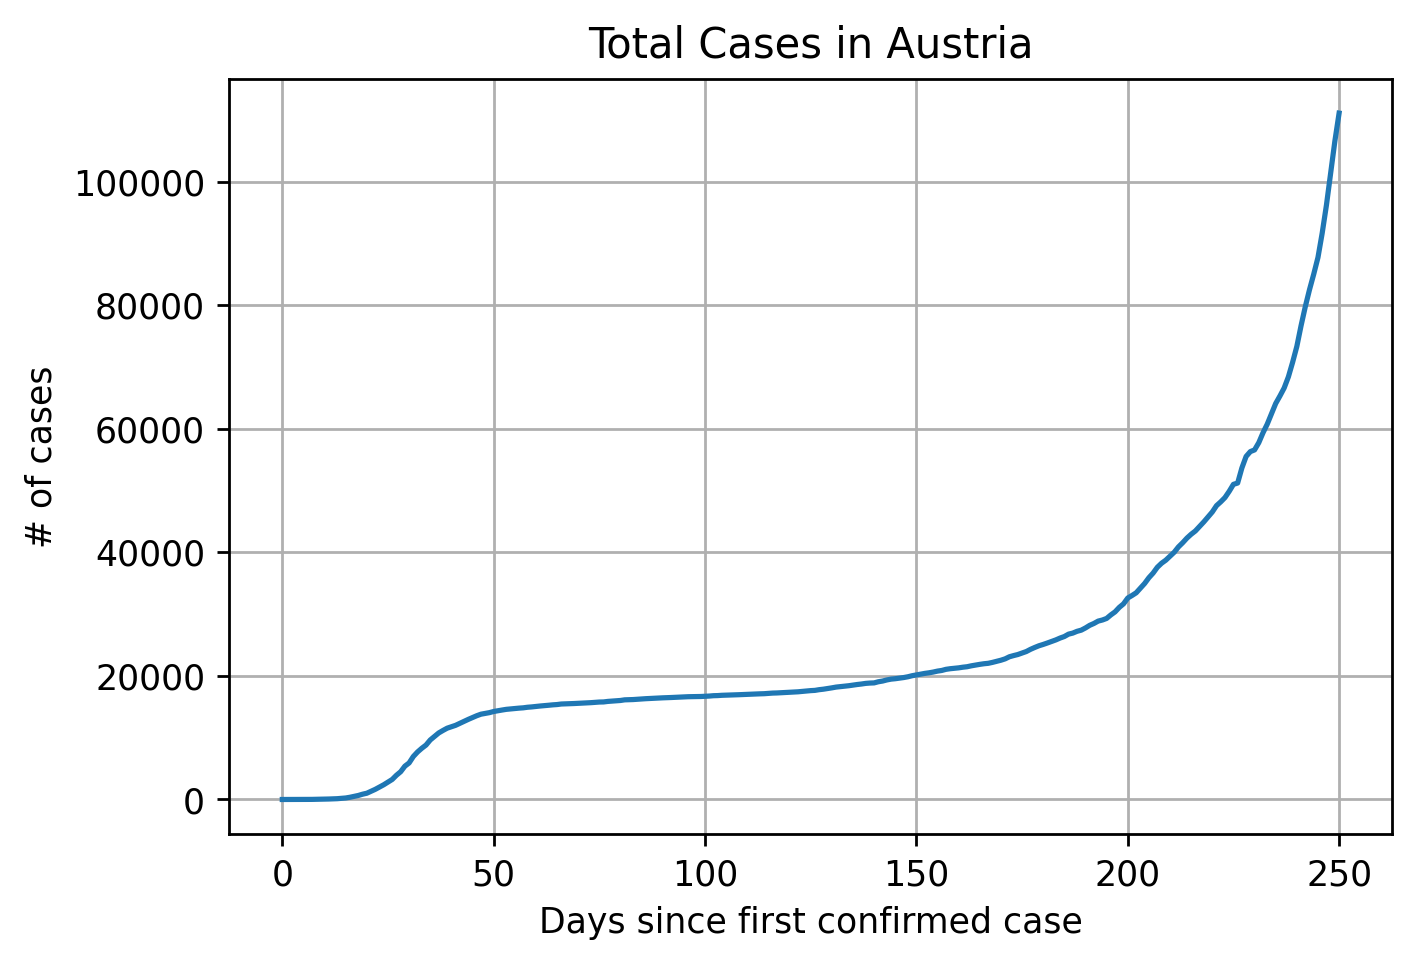

In [102]:
plt.plot(df['Tage'],df['Fälle_gesamt'])
plt.title('Total Cases in Austria')
plt.xlabel('Days since first confirmed case')
plt.ylabel('# of cases')
plt.grid(which='both',axis='both')
plt.show()

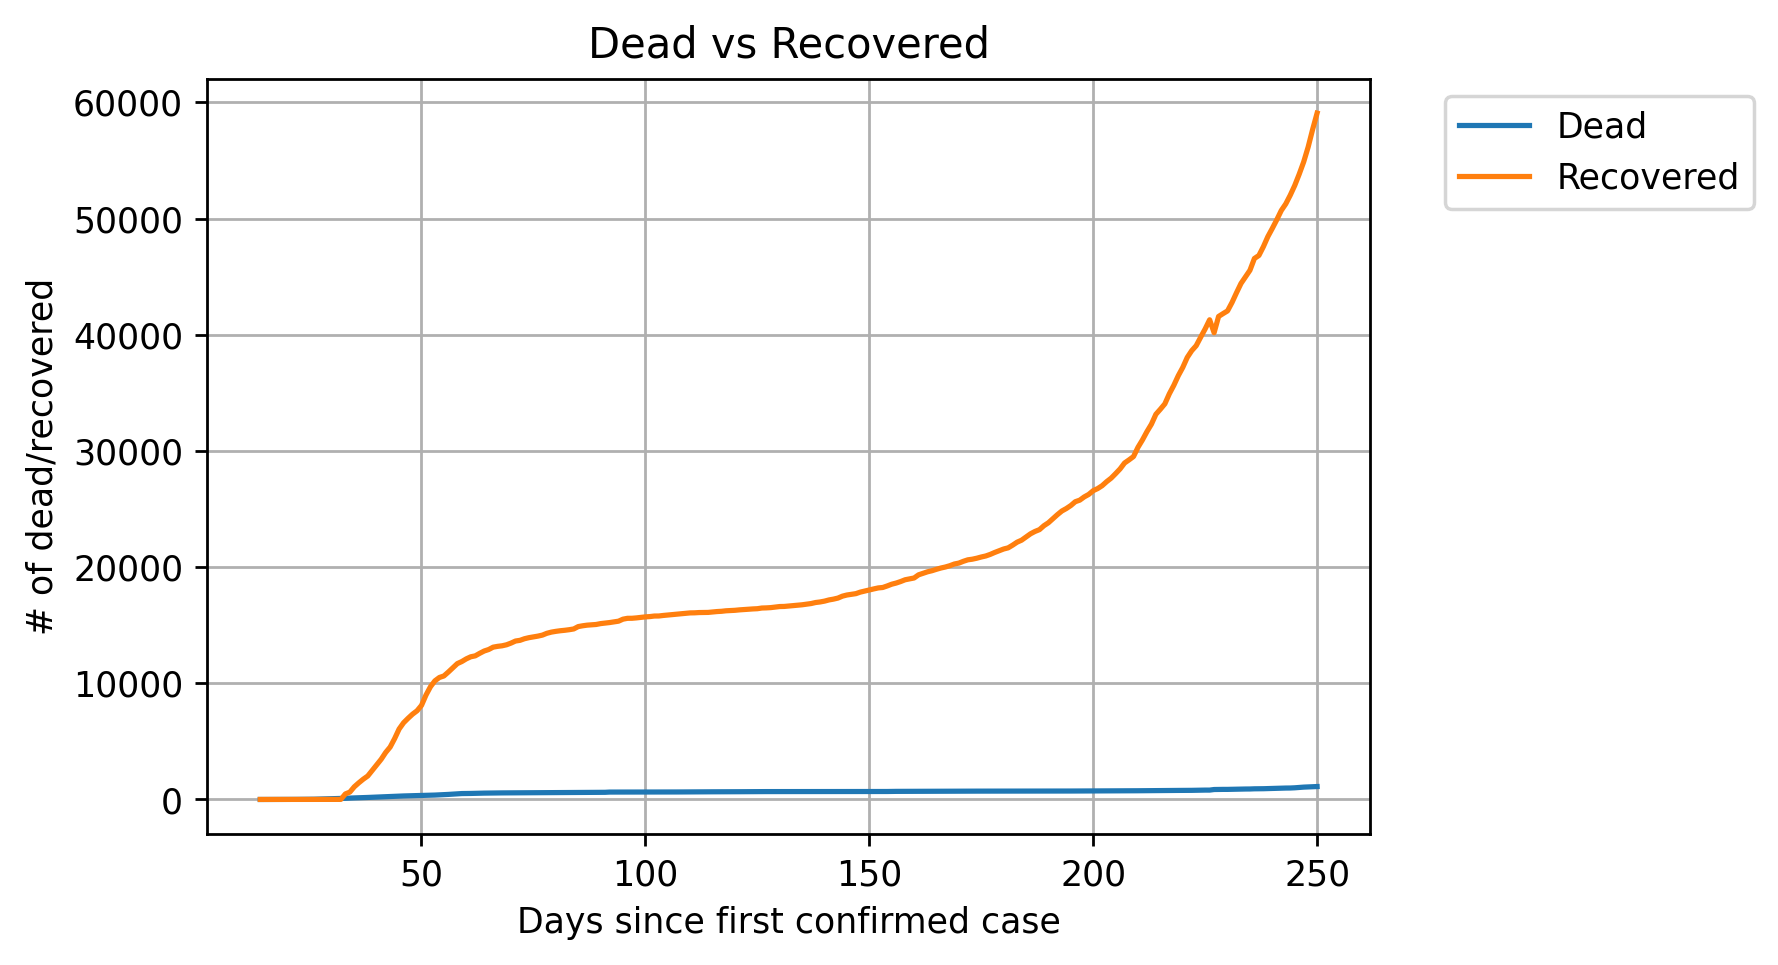

In [152]:
line_dead,=plt.plot(df['Tage'],df['Tote_v2'],label='Dead')
line_recovered,=plt.plot(df['Tage'],df['Genesene'],label='Recovered')
plt.legend(handles=[line_dead,line_recovered],bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Dead vs Recovered')
plt.xlabel('Days since first confirmed case')
plt.ylabel('# of dead/recovered')
plt.grid(which='both',axis='both')
plt.show()

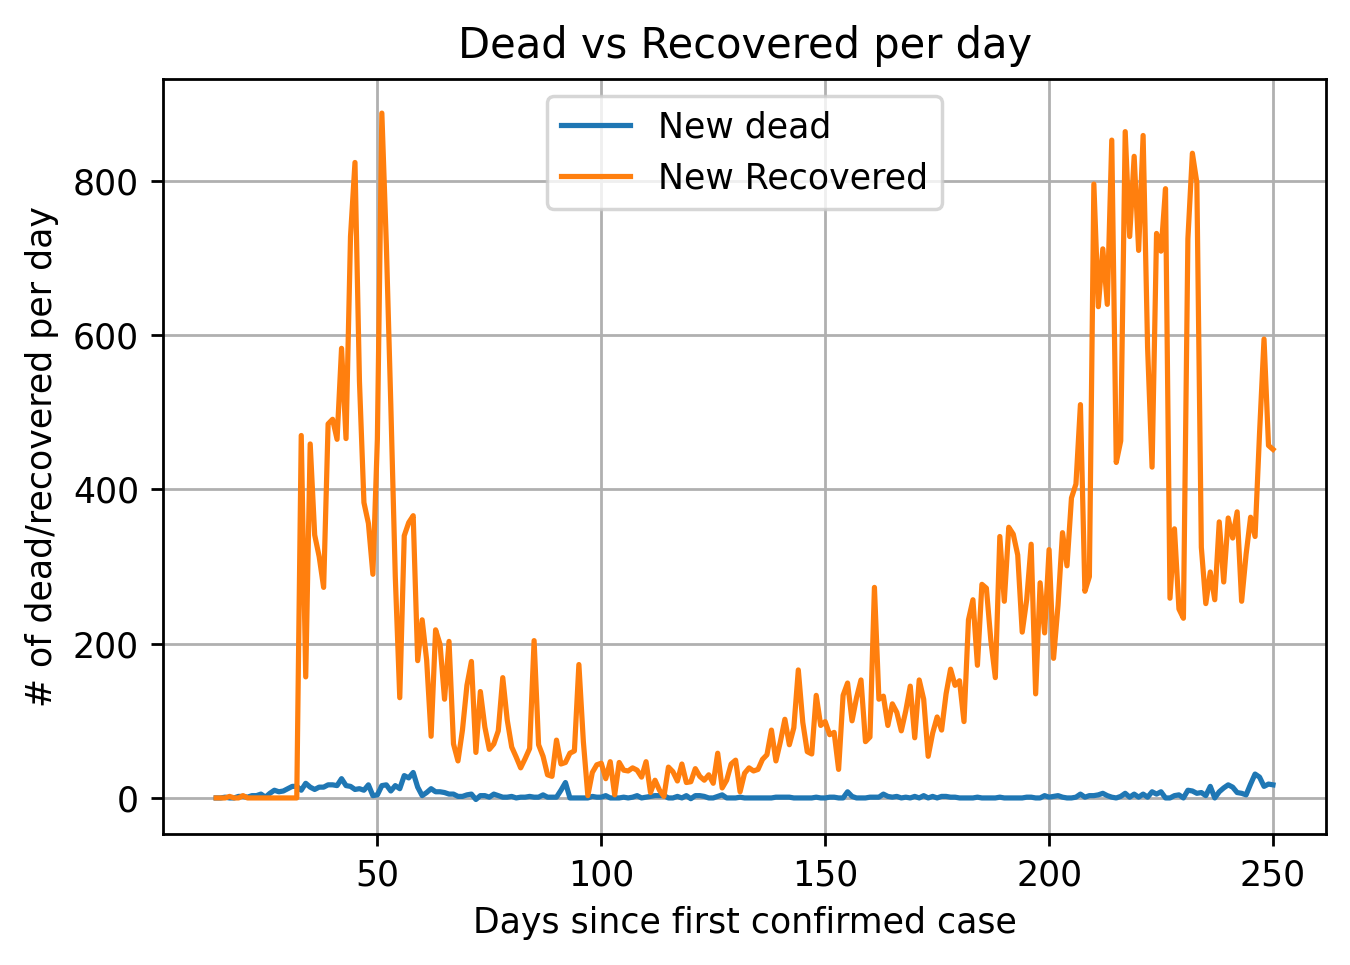

In [104]:
line_dead,=plt.plot(df['Tage'],df['Tote_v2_Zuwachs'],label='New dead ')
line_recovered,=plt.plot(df['Tage'],df['Genesene_Zuwachs'],label='New Recovered')
plt.legend(handles=[line_dead,line_recovered],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Dead vs Recovered per day')
plt.xlabel('Days since first confirmed case')
plt.ylabel('# of dead/recovered per day')
plt.grid(which='both',axis='both')
plt.show()

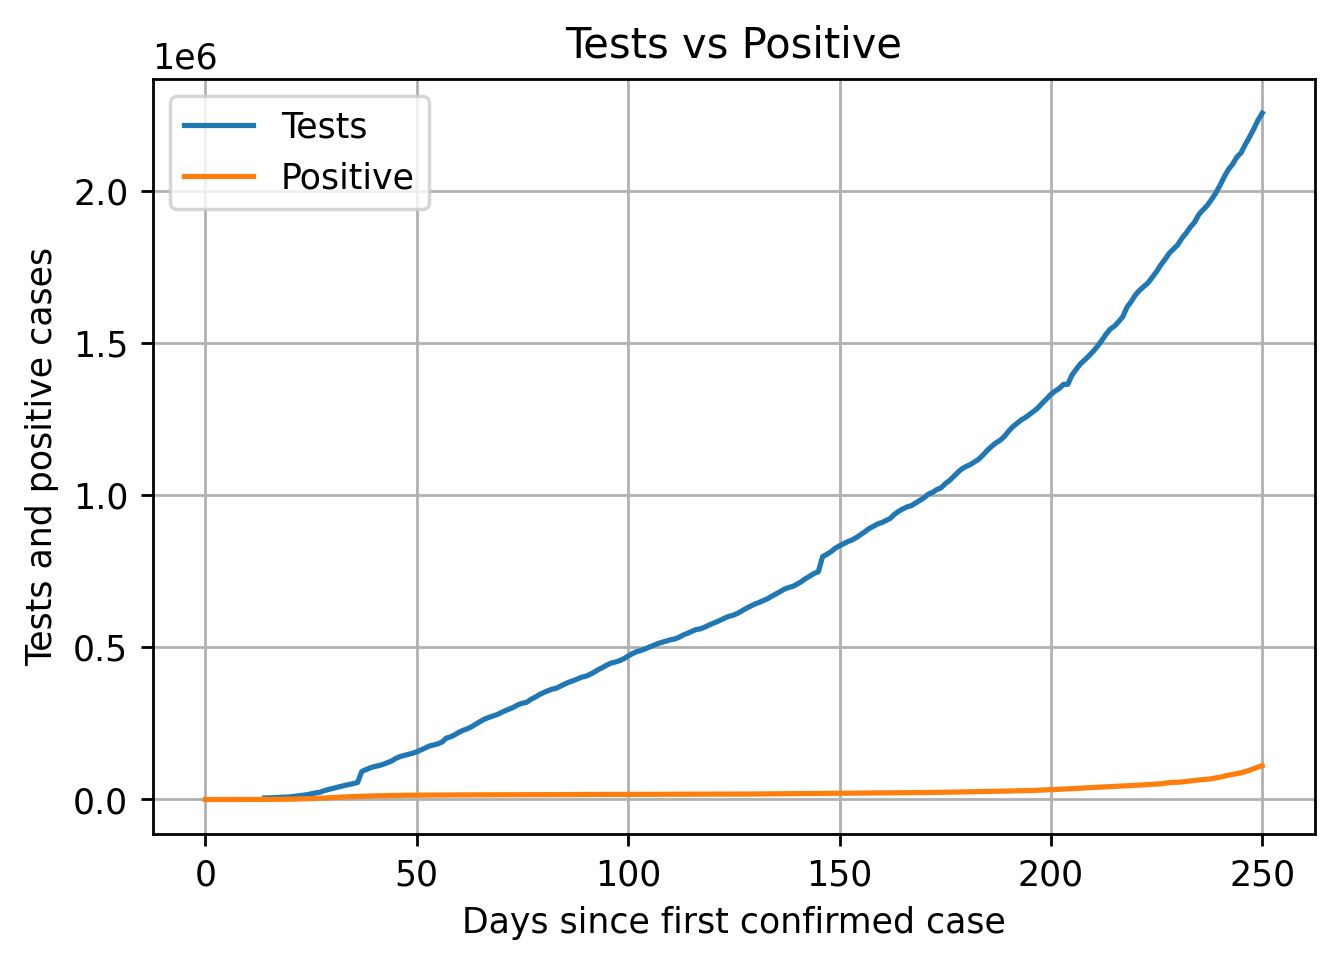

In [105]:
line_tests,=plt.plot(df['Tage'],df['Testungen'],label='Tests')
line_positives,=plt.plot(df['Tage'],df['Fälle_gesamt'],label='Positive')
plt.legend(handles=[line_tests,line_positives],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Tests vs Positive')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Tests and positive cases')
plt.grid(which='both',axis='both')
plt.show()

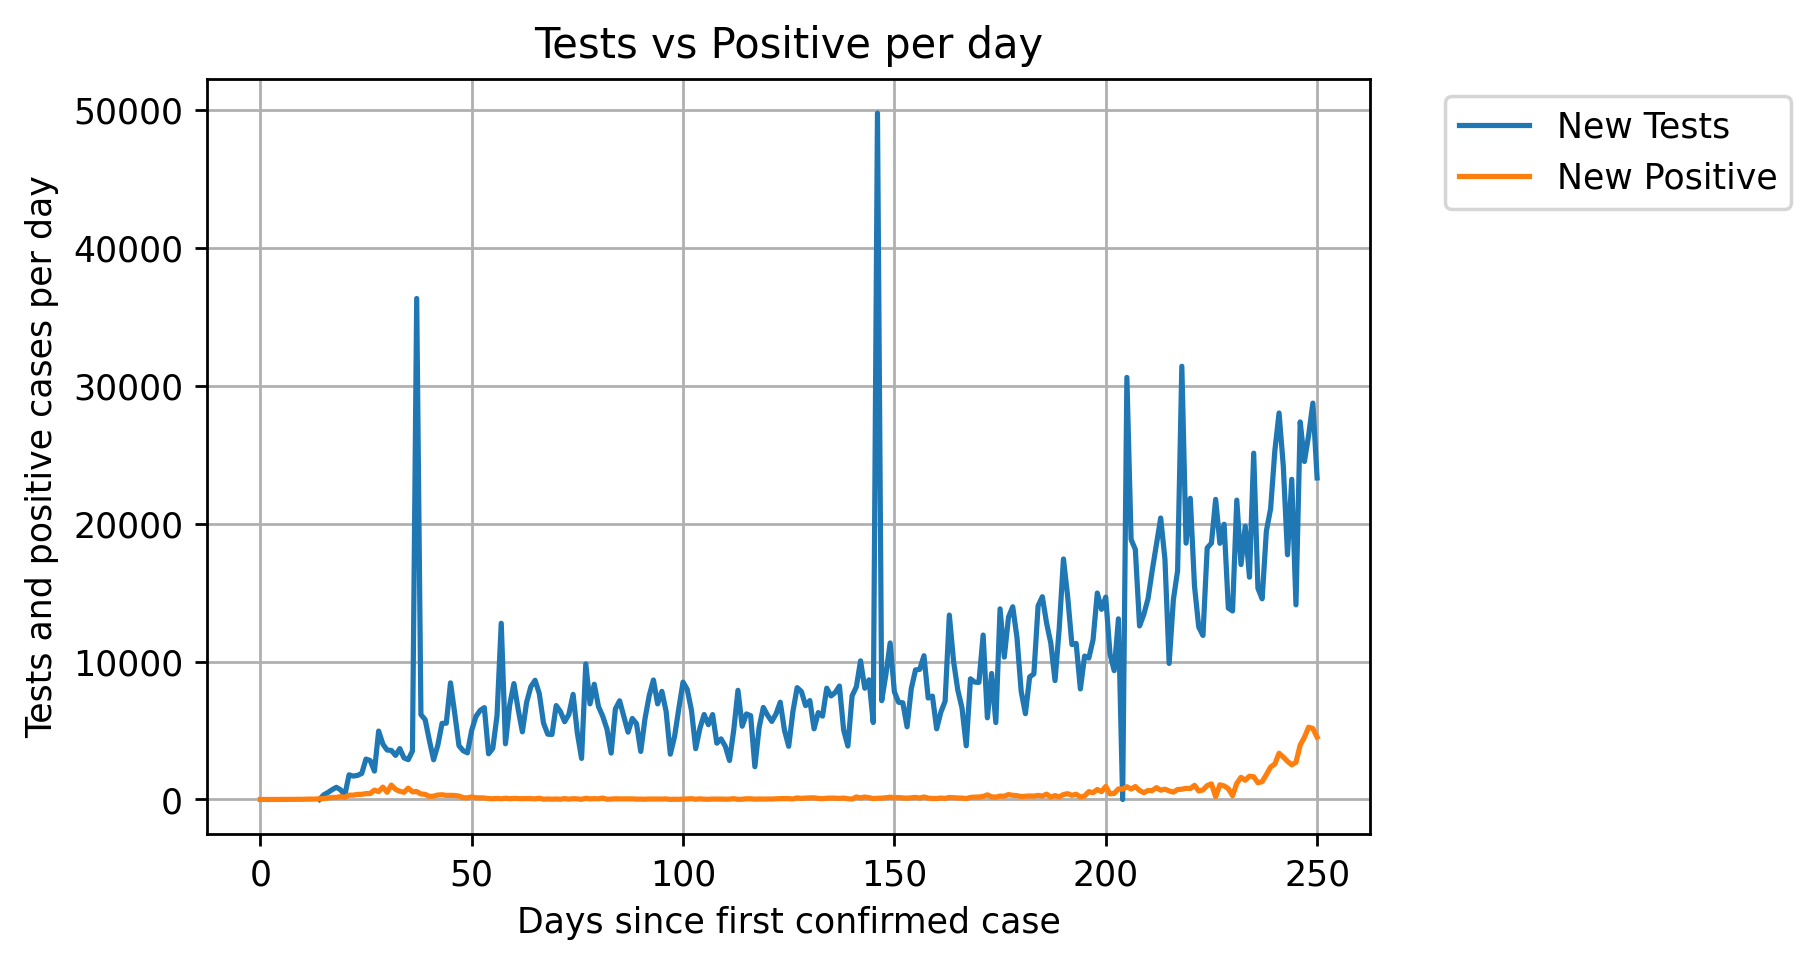

In [153]:
line_tests,=plt.plot(df['Tage'],df['Testungen_Zuwachs'],label='New Tests')
line_positives,=plt.plot(df['Tage'],df['Fälle_Zuwachs'],label='New Positive')
plt.legend(handles=[line_tests,line_positives],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Tests vs Positive per day')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Tests and positive cases per day')
plt.grid(which='both',axis='both')
plt.show()

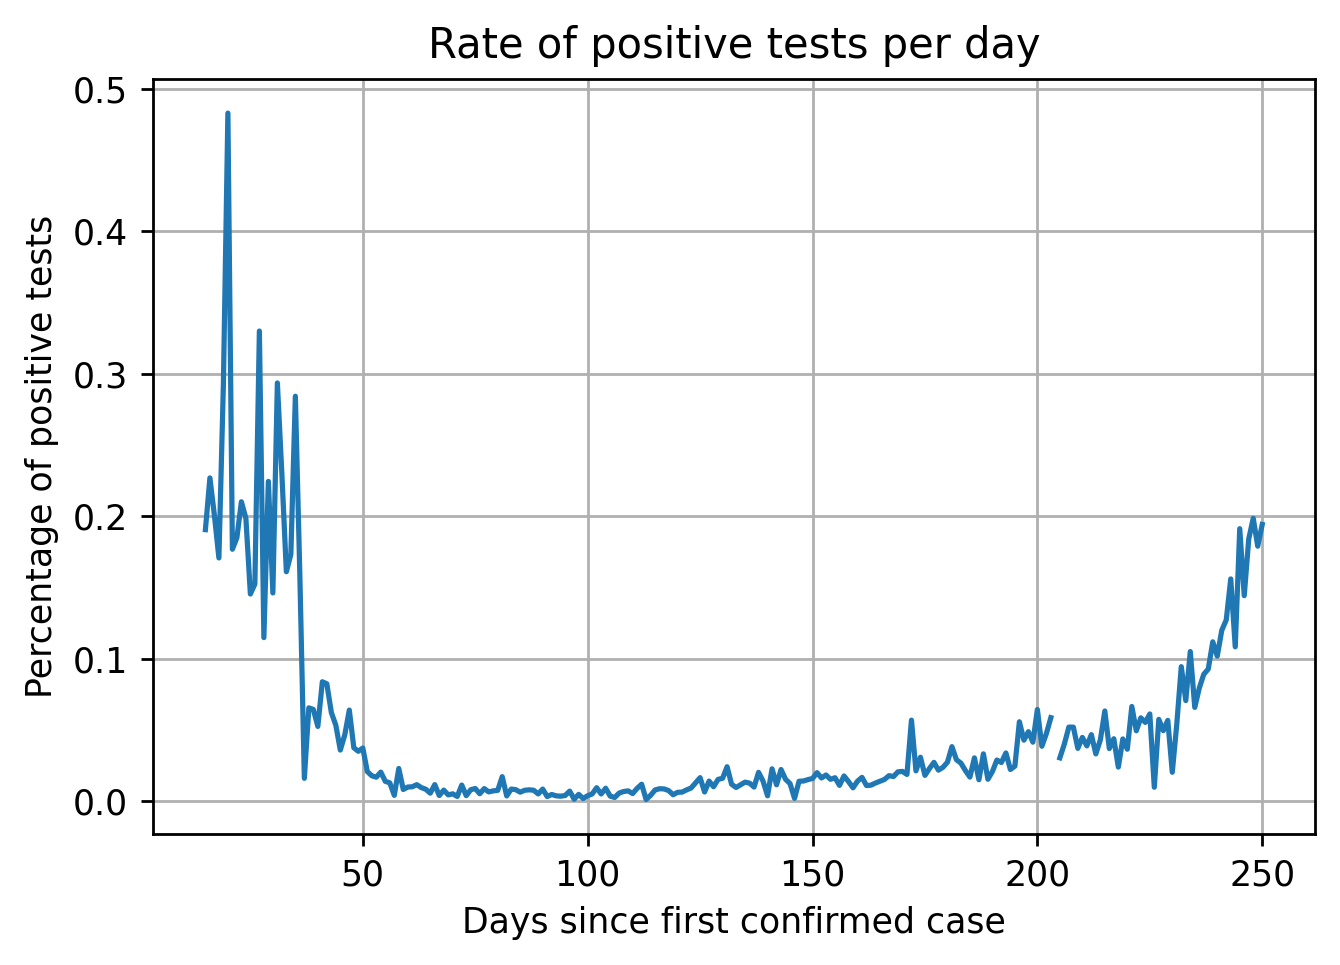

In [107]:
plt.plot(df['Tage'],(df['Fälle_Zuwachs']/df['Testungen_Zuwachs']))
plt.title('Rate of positive tests per day')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Percentage of positive tests')
plt.grid(which='both',axis='both')
plt.show()

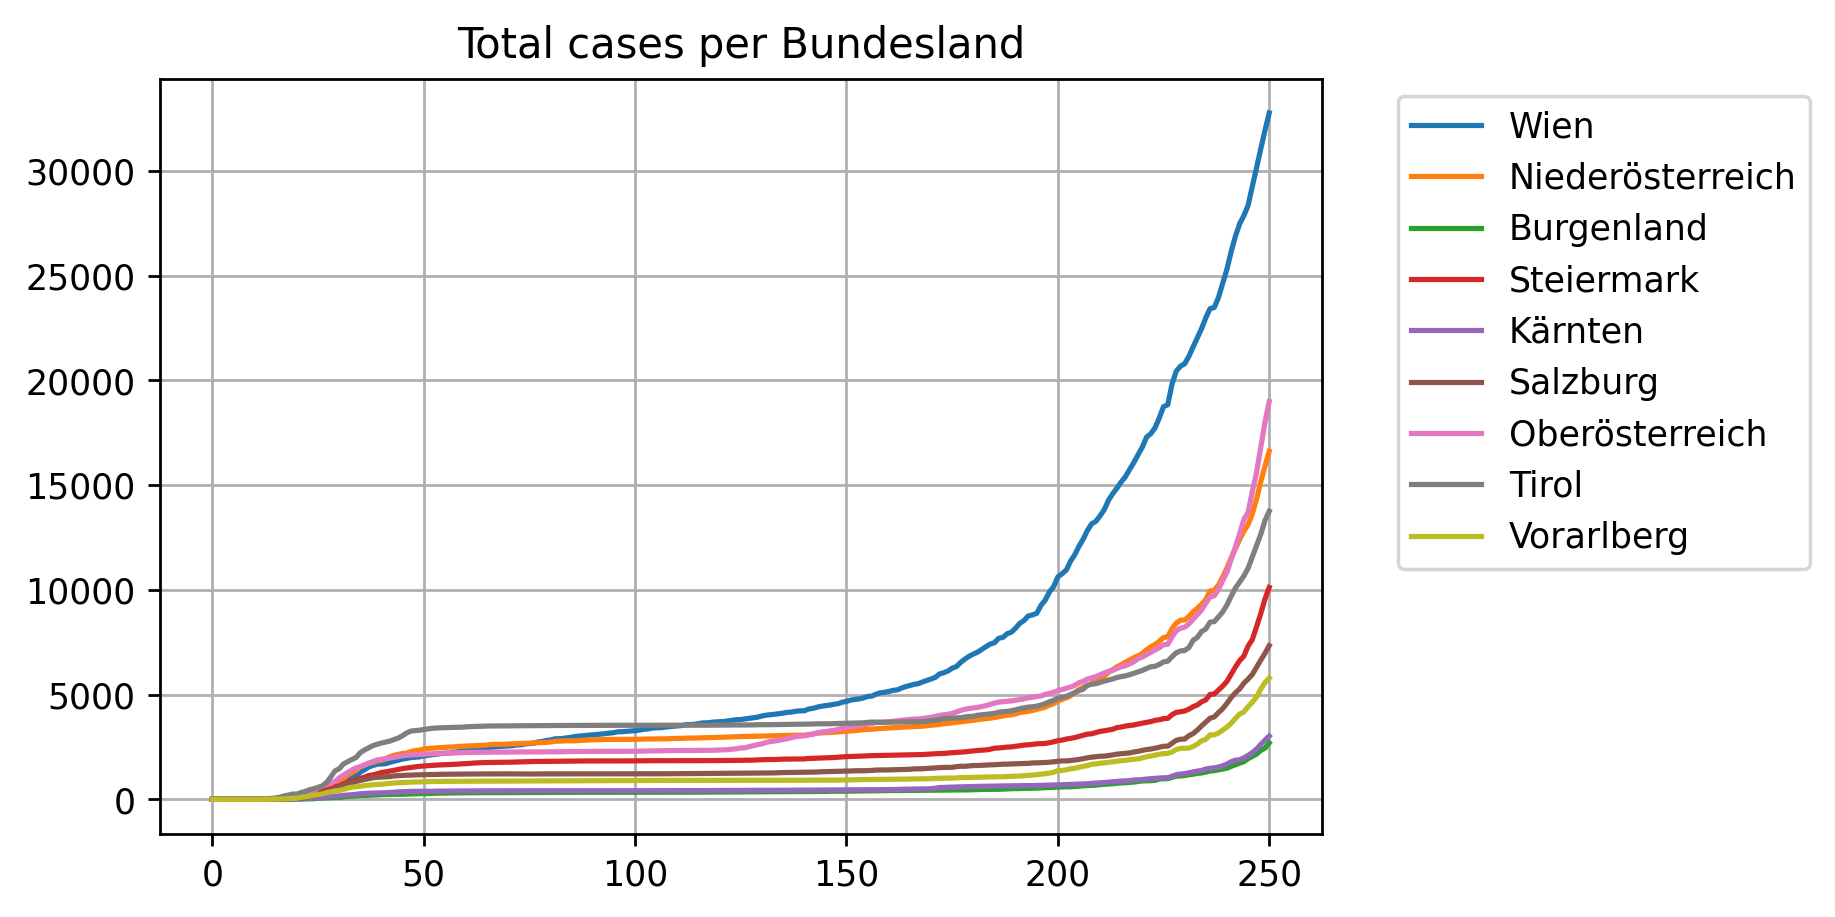

In [154]:
w,=plt.plot(df['Tage'],df['Wien'],label='Wien')
n,=plt.plot(df['Tage'],df['Niederösterreich'],label='Niederösterreich')
b,=plt.plot(df['Tage'],df['Burgenland'],label='Burgenland')
st,=plt.plot(df['Tage'],df['Steiermark'],label='Steiermark')
k,=plt.plot(df['Tage'],df['Kärnten'],label='Kärnten')
s,=plt.plot(df['Tage'],df['Salzburg'],label='Salzburg')
o,=plt.plot(df['Tage'],df['Oberösterreich'],label='Oberösterreich')
t,=plt.plot(df['Tage'],df['Tirol'],label='Tirol')
v,=plt.plot(df['Tage'],df['Vorarlberg'],label='Vorarlberg')

plt.grid(which='both',axis='both')
plt.title('Total cases per Bundesland') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

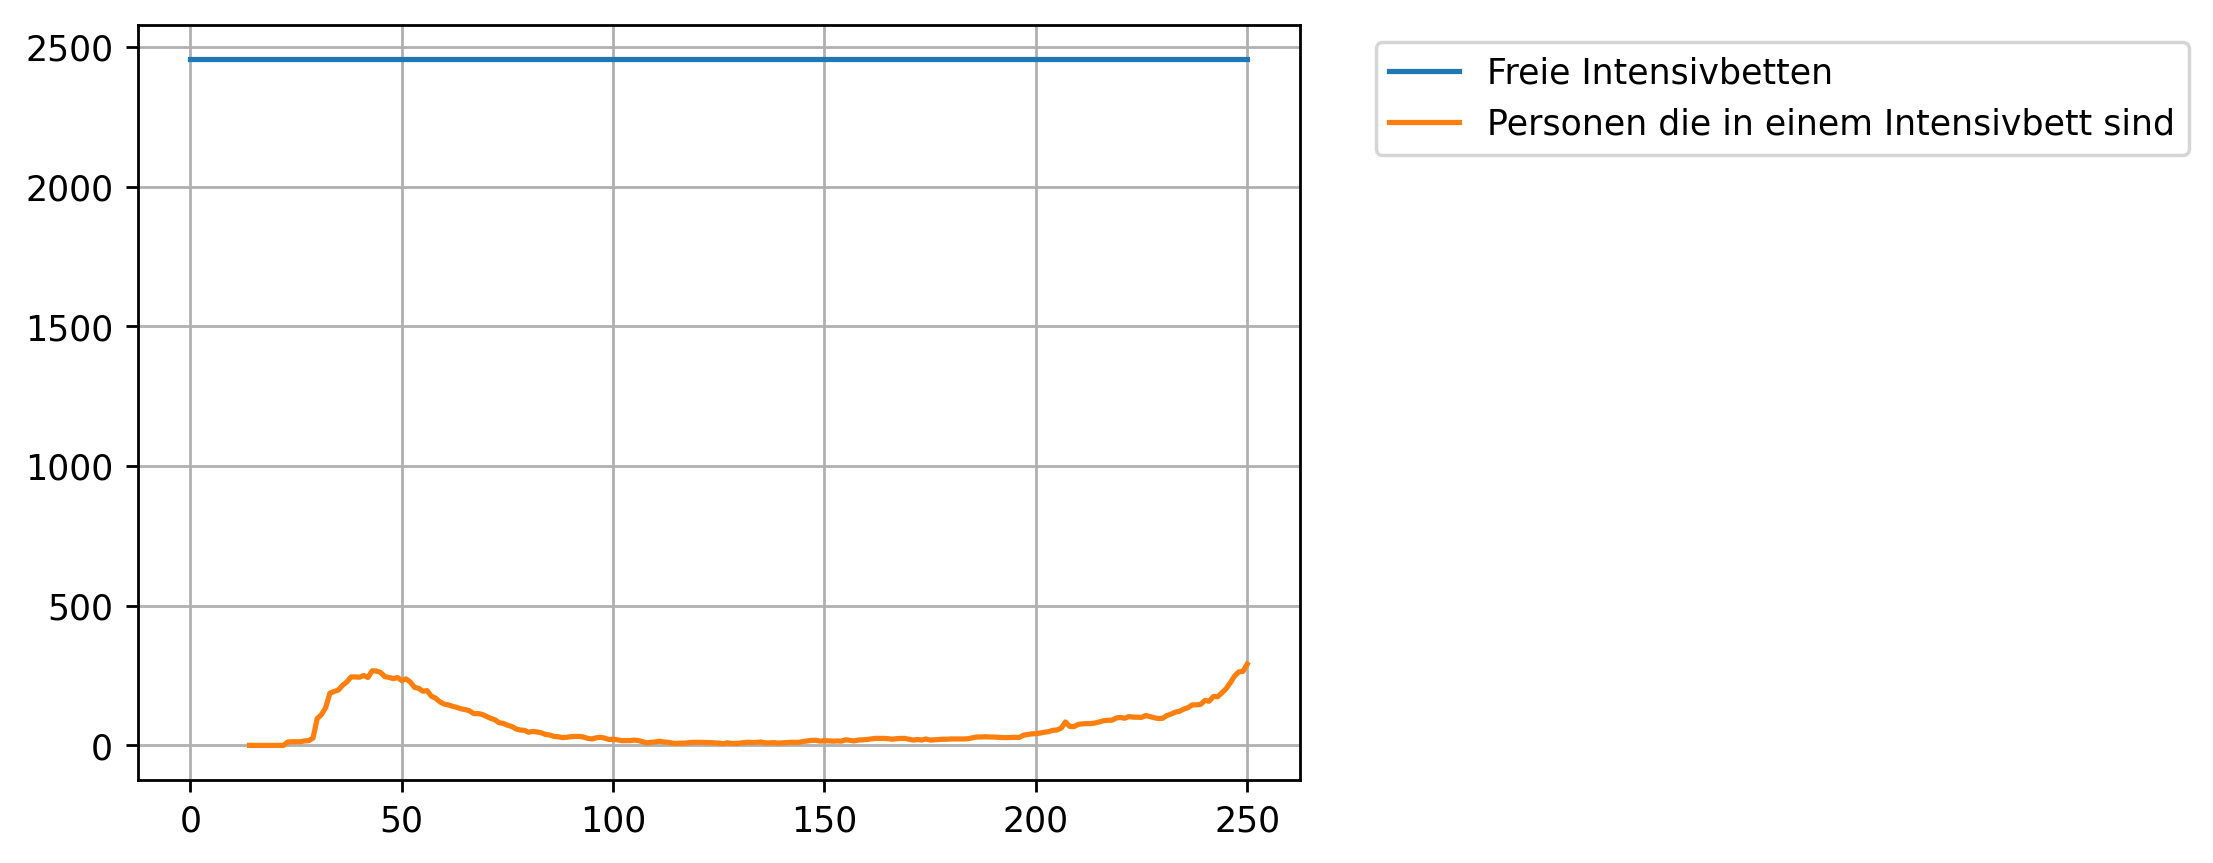

In [158]:
bett_frei,=plt.plot(df['Tage'],[2457]*len(df['Tage']),label='Freie Intensivbetten')
plt.plot(df['Tage'],df['Intensivstation'],label='Personen die in einem Intensivbett sind')
plt.grid(which='both',axis='both')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

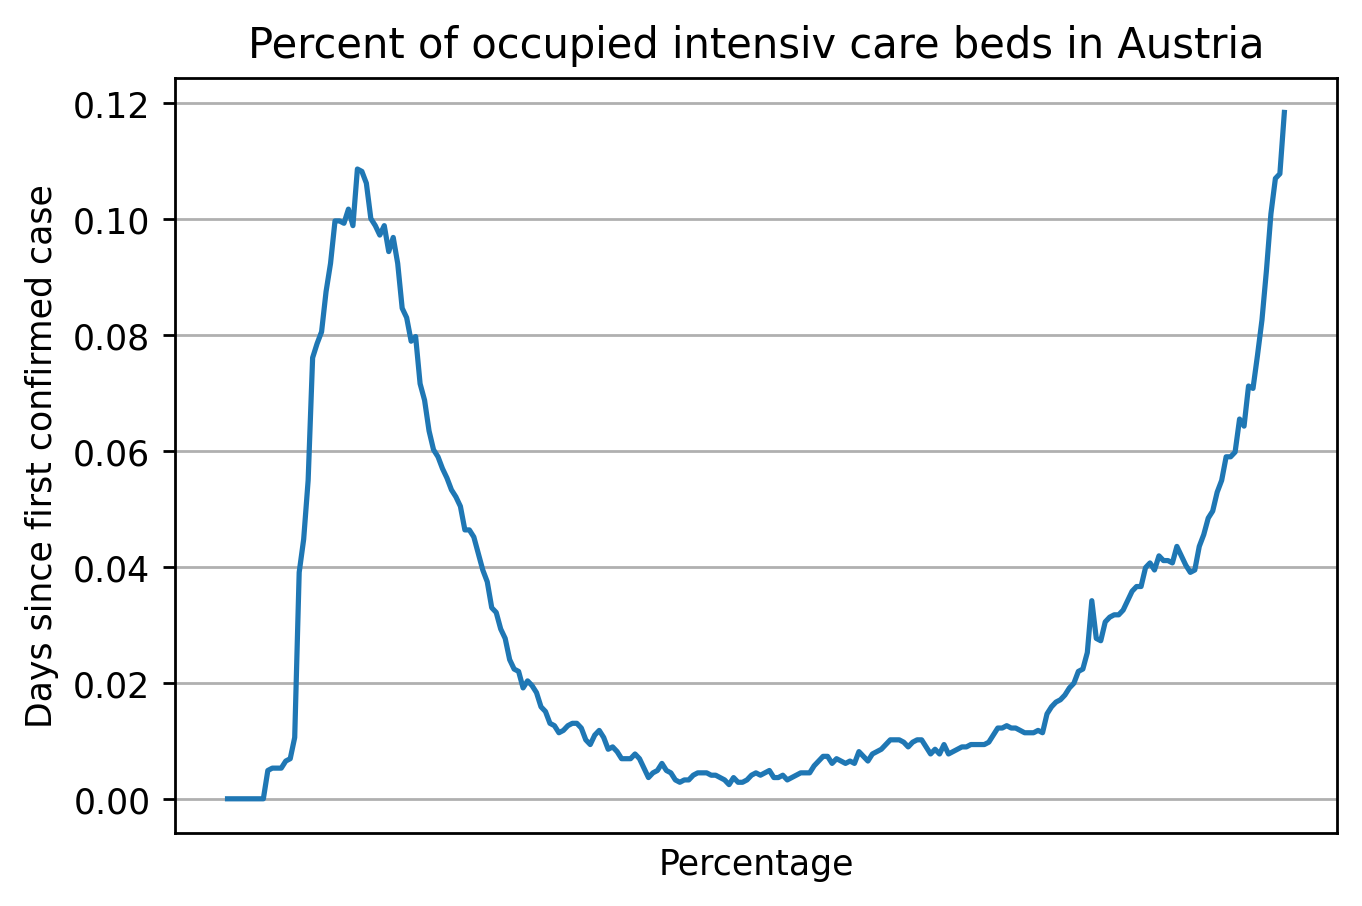

In [175]:
import numpy as np
plt.plot(df['Tage'],df['Intensivstation']/([2457]*len(df['Tage'])))

plt.xlabel('Percentage')
plt.ylabel('Days since first confirmed case')
plt.title('Percent of occupied intensiv care beds in Austria')
plt.grid(which='both',axis='both')
plt.xticks(np.arange(0, 1))


plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


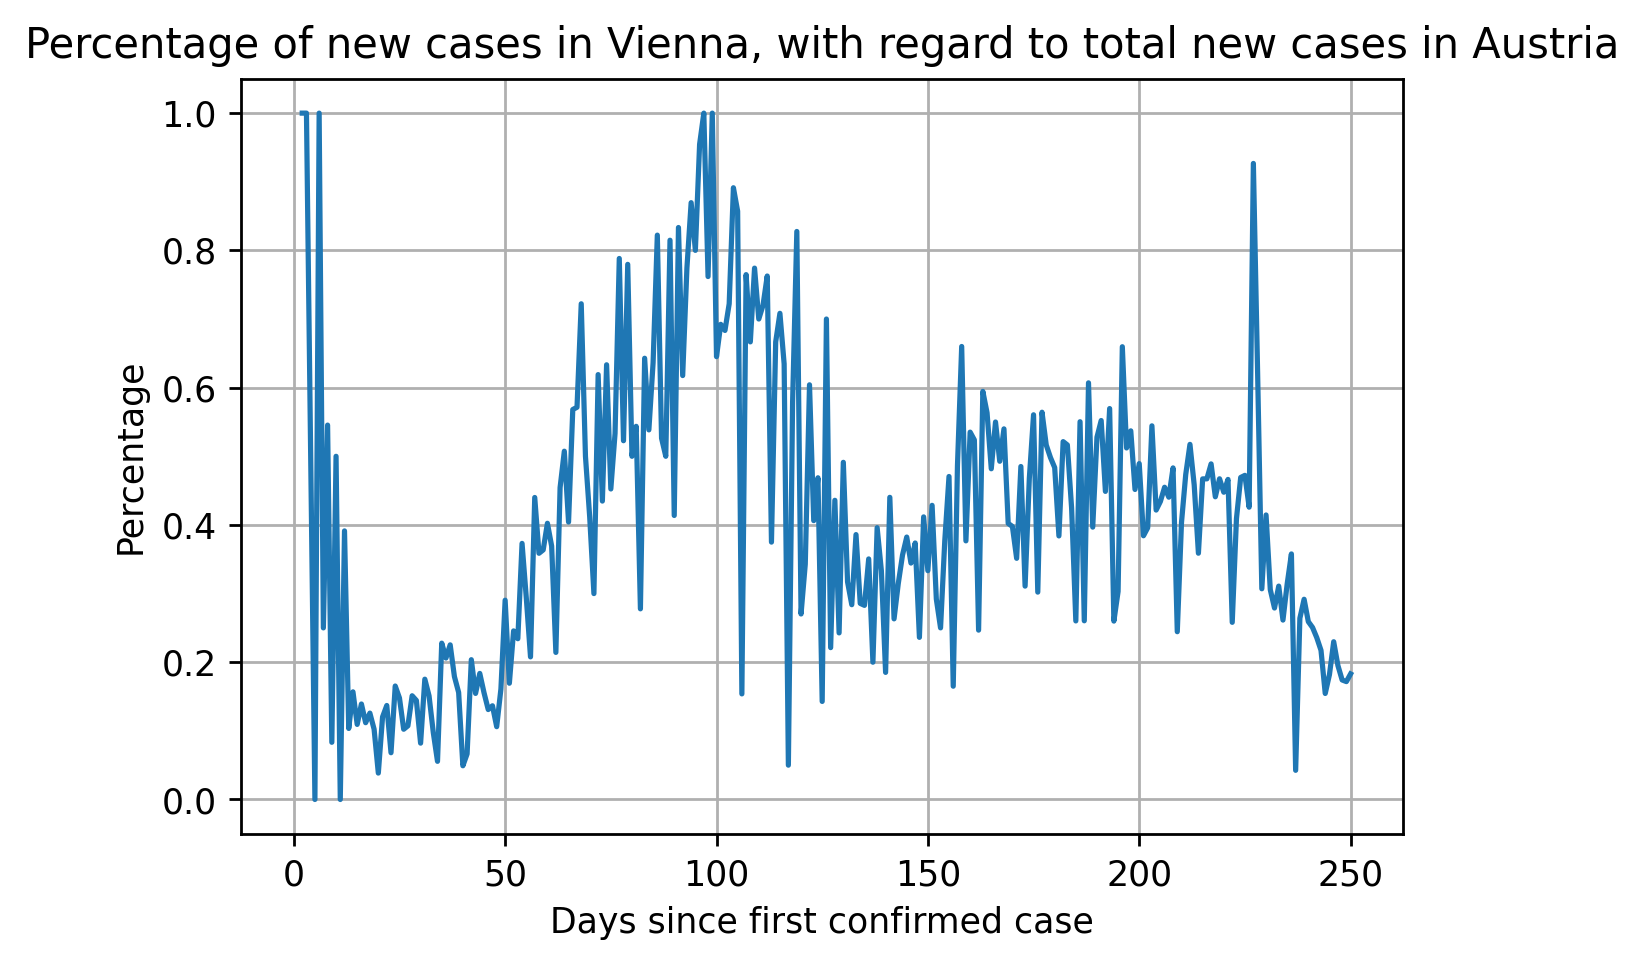

In [150]:
df['Wien neu']=0
 
for i in range (1,len(df)):
    df['Wien neu'][i]=df['Wien'][i]-df['Wien'][i-1]

plt.plot(df['Tage'],df['Wien neu']/df['Fälle_Zuwachs'])
plt.title('Percentage of new cases in Vienna, with regard to total new cases in Austria')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Percentage')
plt.grid(which='both',axis='both')
plt.show()

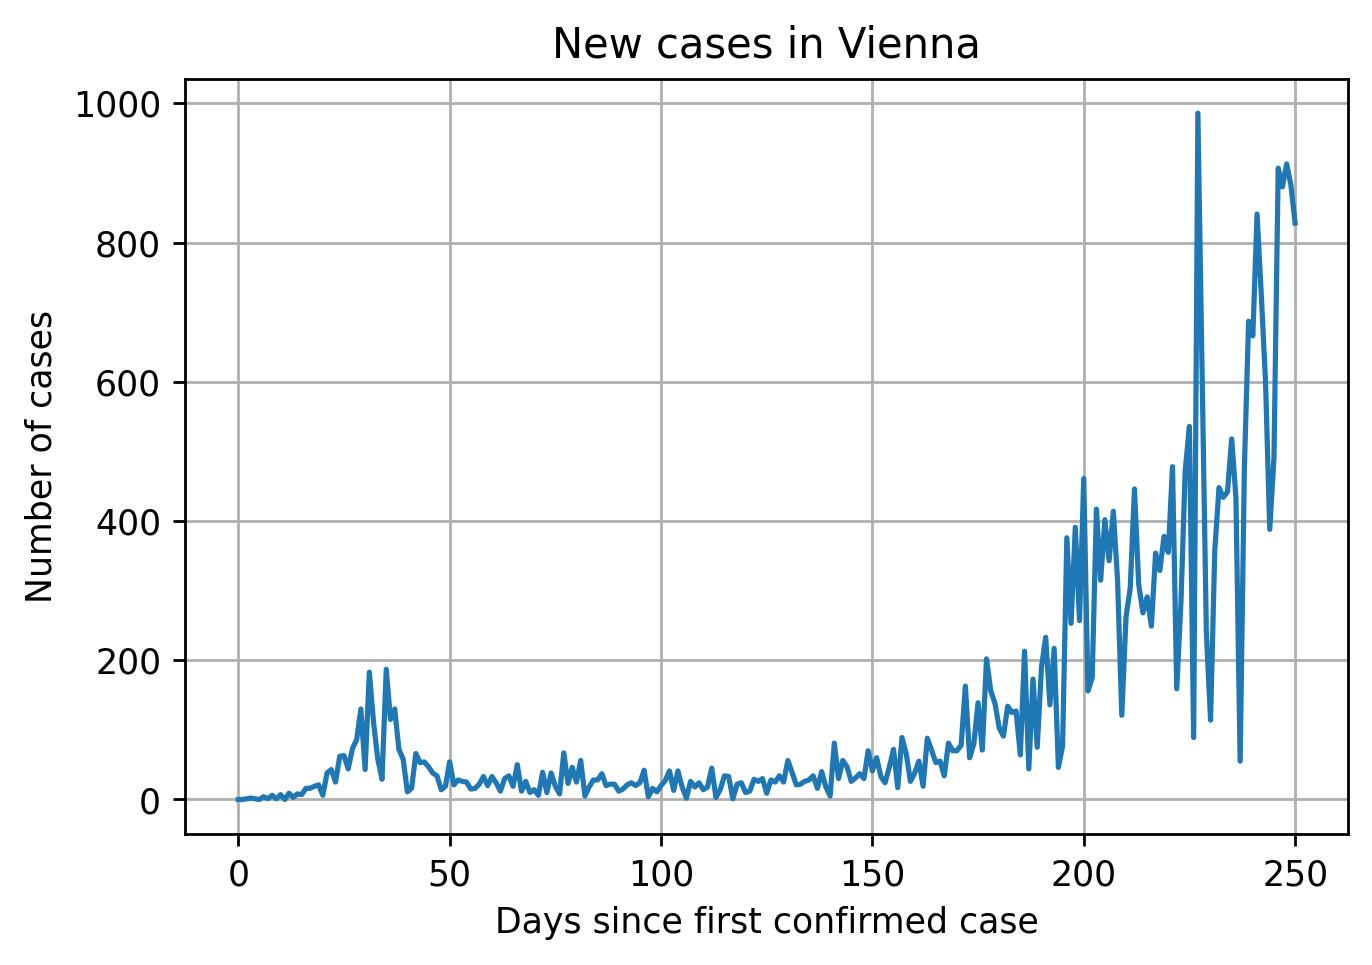

In [174]:
plt.plot(df['Tage'],df['Wien neu'])
plt.title('New cases in Vienna')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Number of cases')
plt.grid(which='both',axis='both')
plt.show()

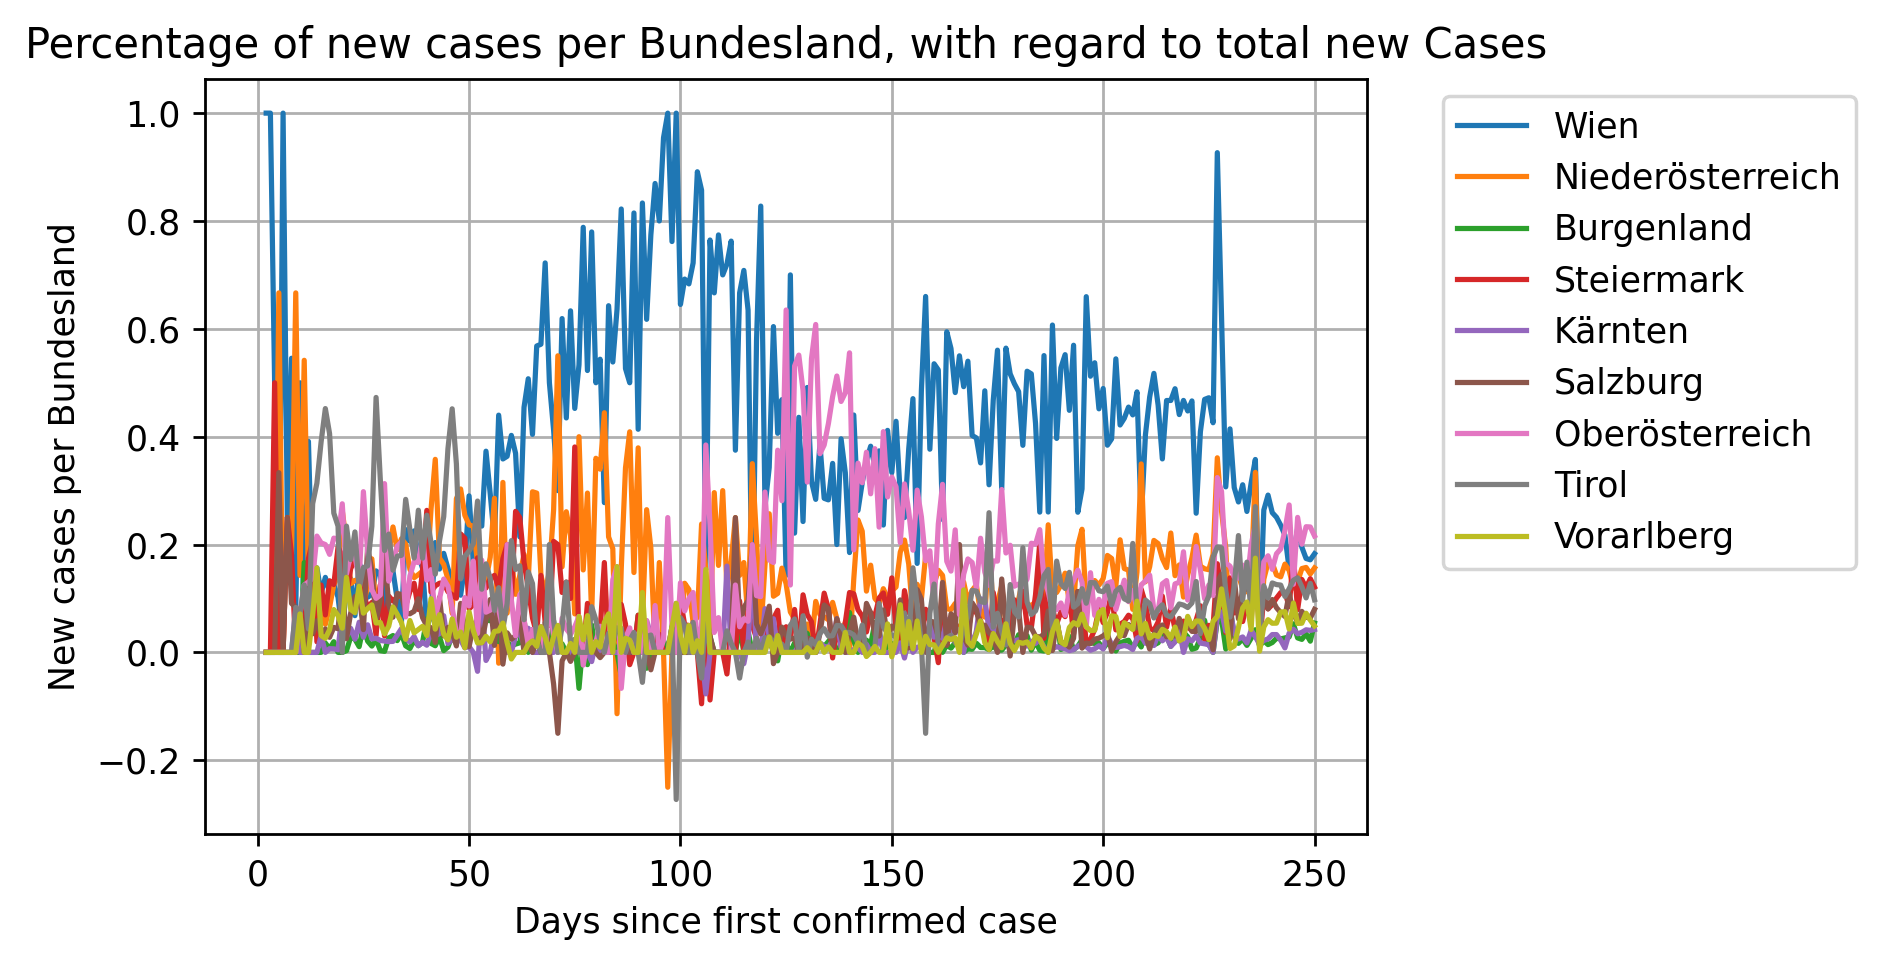

In [164]:
w,=plt.plot(df['Tage'],df['Wien neu']/df['Fälle_Zuwachs'],label='Wien')
n,=plt.plot(df['Tage'],df['Niederösterreich neu']/df['Fälle_Zuwachs'],label='Niederösterreich')
b,=plt.plot(df['Tage'],df['Burgenland neu']/df['Fälle_Zuwachs'],label='Burgenland')
st,=plt.plot(df['Tage'],df['Steiermark neu']/df['Fälle_Zuwachs'],label='Steiermark')
k,=plt.plot(df['Tage'],df['Kärnten neu']/df['Fälle_Zuwachs'],label='Kärnten')
s,=plt.plot(df['Tage'],df['Salzburg neu']/df['Fälle_Zuwachs'],label='Salzburg')
o,=plt.plot(df['Tage'],df['Oberösterreich neu']/df['Fälle_Zuwachs'],label='Oberösterreich')
t,=plt.plot(df['Tage'],df['Tirol neu']/df['Fälle_Zuwachs'],label='Tirol')
v,=plt.plot(df['Tage'],df['Vorarlberg neu']/df['Fälle_Zuwachs'],label='Vorarlberg')
 
plt.title('Percentage of new cases per Bundesland, with regard to total new Cases')
plt.xlabel('Days since first confirmed case')
plt.ylabel('New cases ')
plt.grid(which='both',axis='both') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



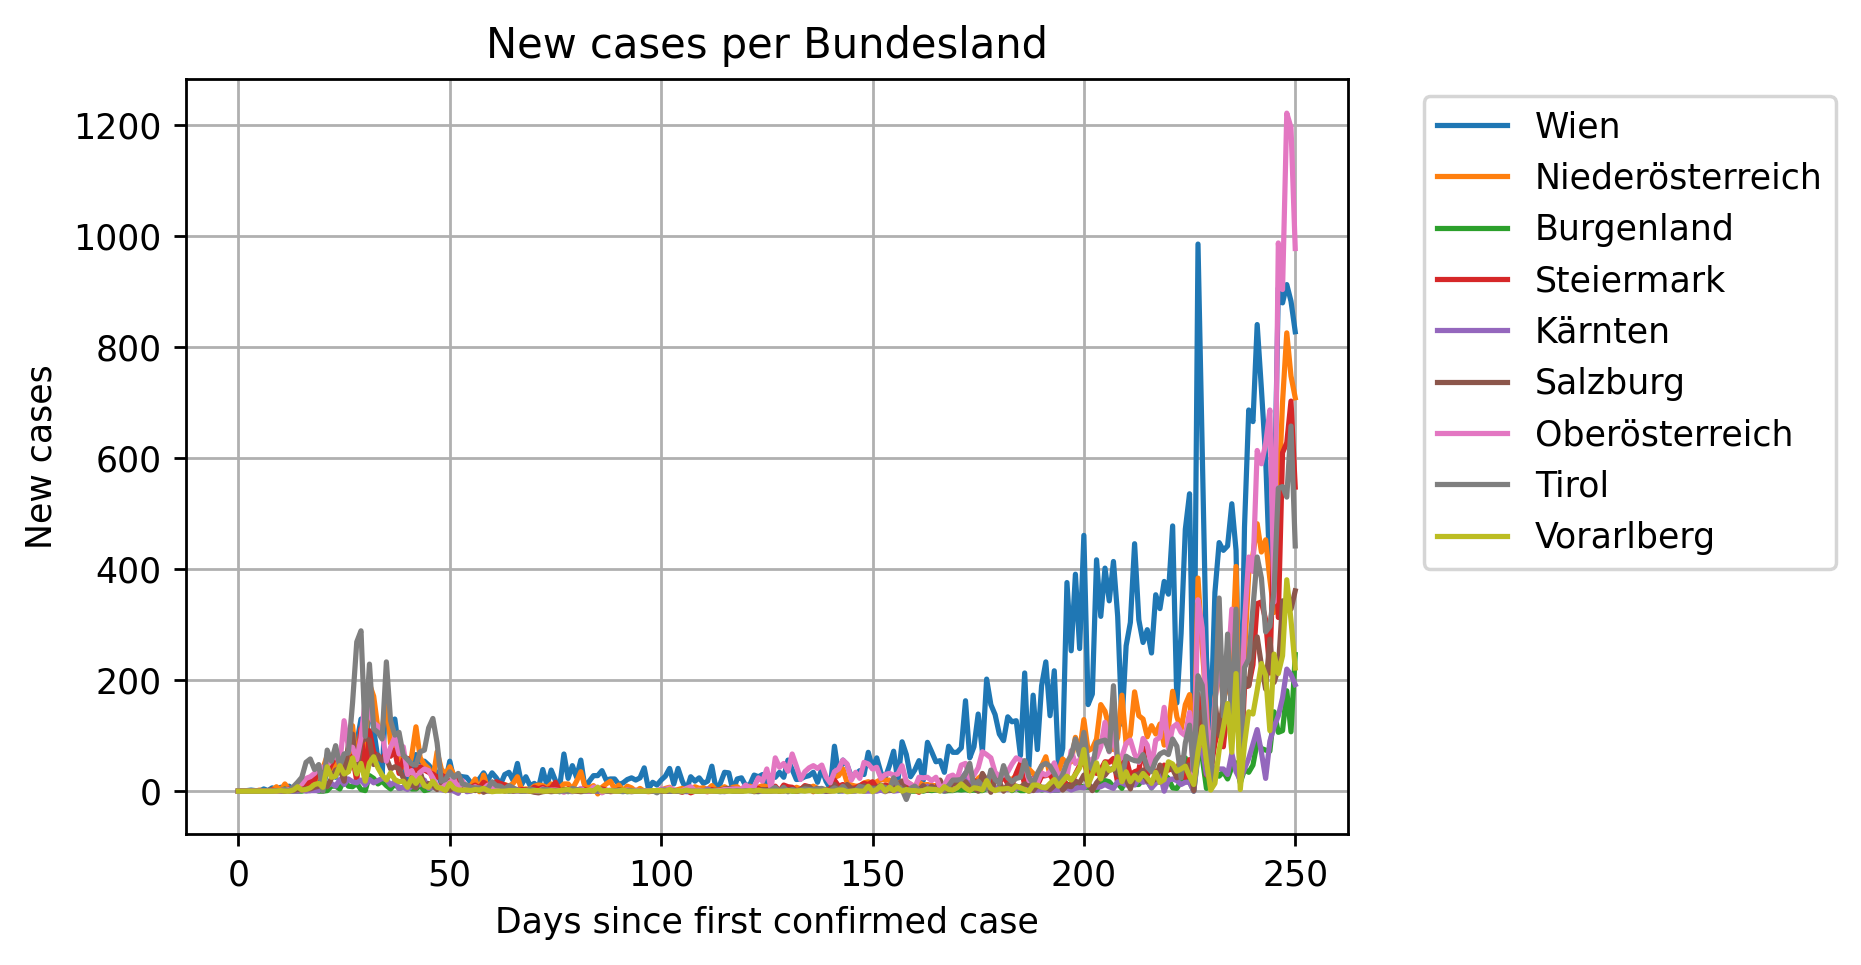

In [173]:

w,=plt.plot(df['Tage'],df['Wien neu'],label='Wien')
n,=plt.plot(df['Tage'],df['Niederösterreich neu'],label='Niederösterreich')
b,=plt.plot(df['Tage'],df['Burgenland neu'],label='Burgenland')
st,=plt.plot(df['Tage'],df['Steiermark neu'],label='Steiermark')
k,=plt.plot(df['Tage'],df['Kärnten neu'],label='Kärnten')
s,=plt.plot(df['Tage'],df['Salzburg neu'],label='Salzburg')
o,=plt.plot(df['Tage'],df['Oberösterreich neu'],label='Oberösterreich')
t,=plt.plot(df['Tage'],df['Tirol neu'],label='Tirol')
v,=plt.plot(df['Tage'],df['Vorarlberg neu'],label='Vorarlberg')
 
plt.title('New cases per Bundesland')
plt.xlabel('Days since first confirmed case')
plt.ylabel('New cases')
plt.grid(which='both',axis='both') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# New Section

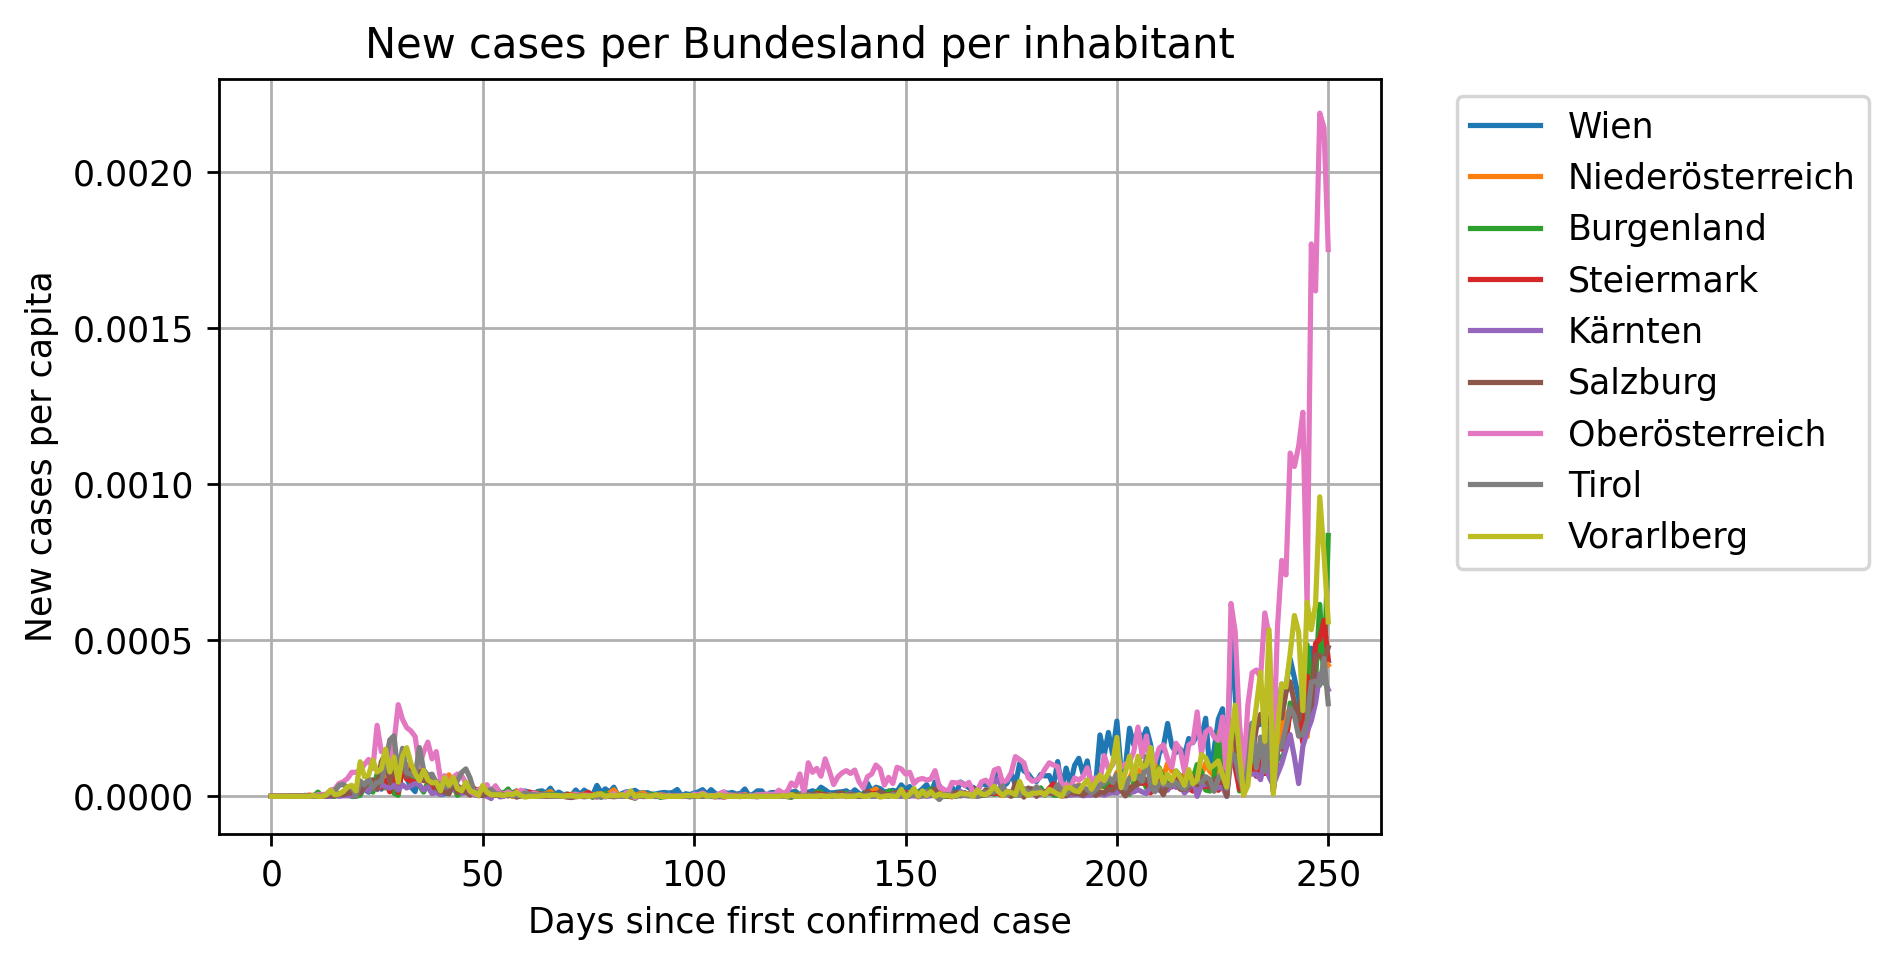

In [166]:
#Source: https://de.statista.com/statistik/daten/studie/75396/umfrage/entwicklung-der-bevoelkerung-in-oesterreich-nach-bundesland-seit-1996/#professional

population=[1911191,1684287,294436,1246395,561293,757634,558410,1490279,397139]


w,=plt.plot(df['Tage'],df['Wien neu']/population[0],label='Wien')
n,=plt.plot(df['Tage'],df['Niederösterreich neu']/population[1],label='Niederösterreich')
b,=plt.plot(df['Tage'],df['Burgenland neu']/population[2],label='Burgenland')
st,=plt.plot(df['Tage'],df['Steiermark neu']/population[3],label='Steiermark')
k,=plt.plot(df['Tage'],df['Kärnten neu']/population[4],label='Kärnten')
s,=plt.plot(df['Tage'],df['Salzburg neu']/population[5],label='Salzburg')
o,=plt.plot(df['Tage'],df['Oberösterreich neu']/population[6],label='Oberösterreich')
t,=plt.plot(df['Tage'],df['Tirol neu']/population[7],label='Tirol')
v,=plt.plot(df['Tage'],df['Vorarlberg neu']/population[8],label='Vorarlberg')
 
plt.title('New cases per Bundesland per inhabitant')
plt.xlabel('Days since first confirmed case')
plt.ylabel('New cases per capita')
plt.grid(which='both',axis='both') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
 
 

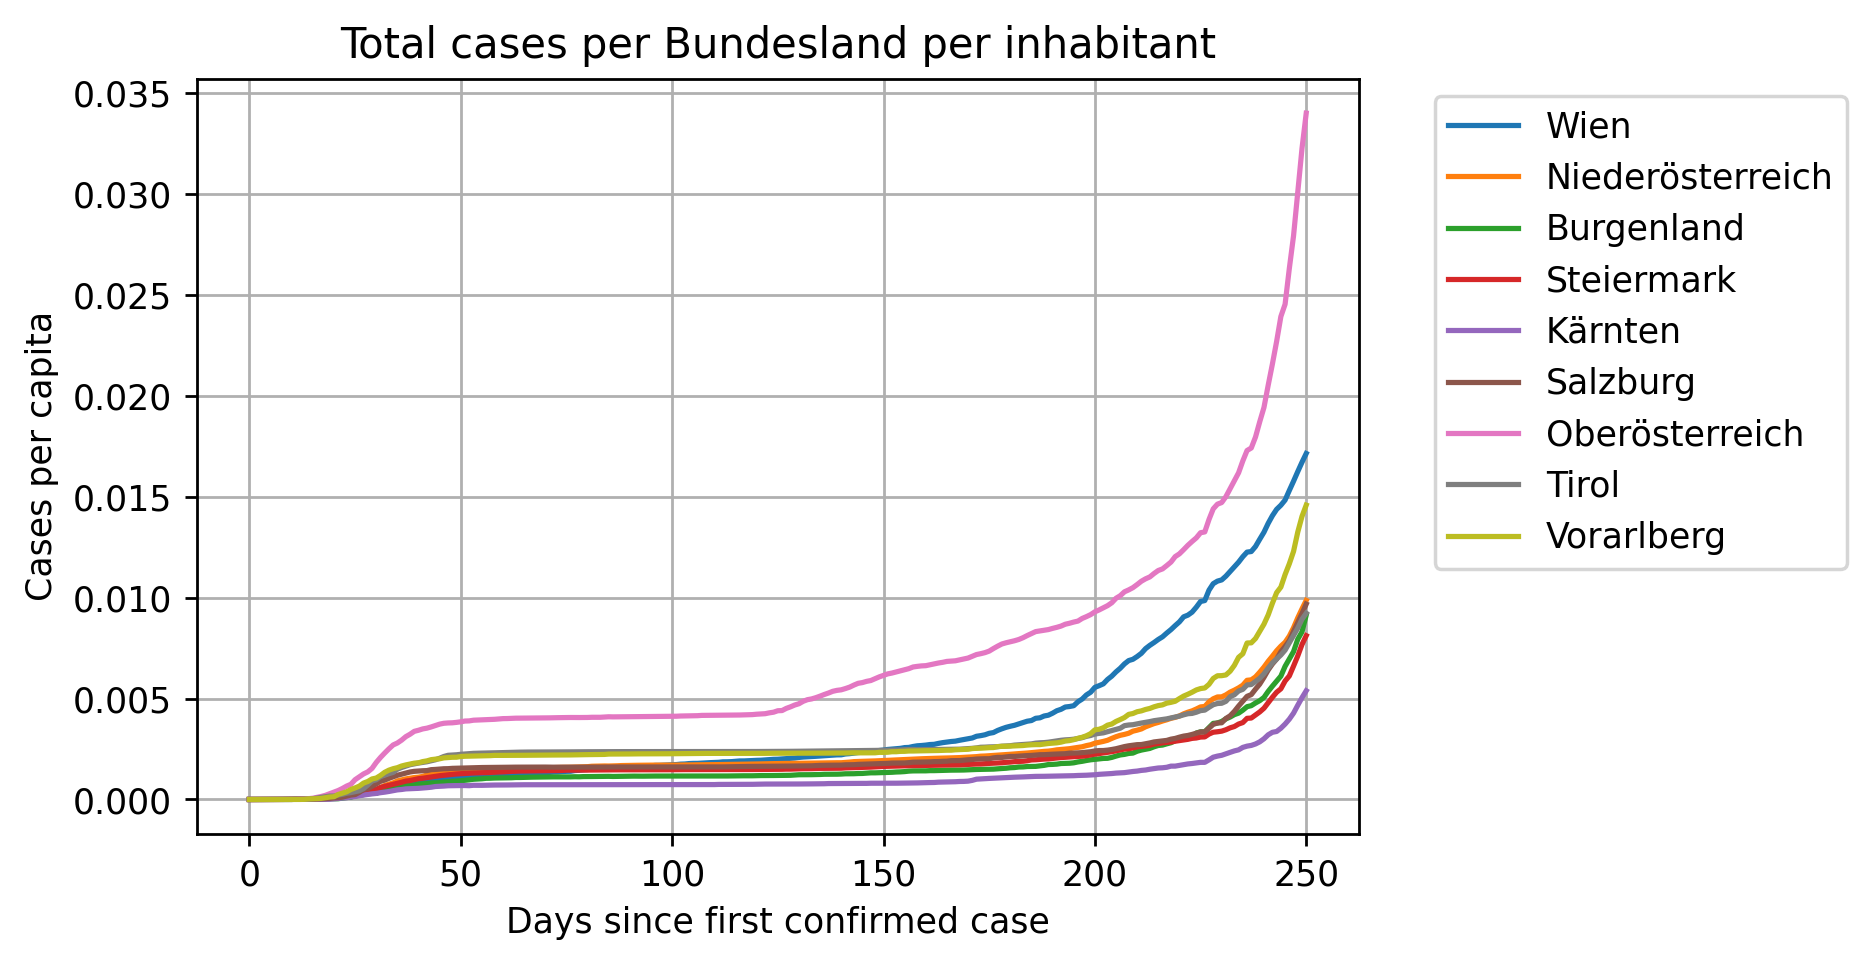

In [167]:

w,=plt.plot(df['Tage'],df['Wien']/population[0],label='Wien')
n,=plt.plot(df['Tage'],df['Niederösterreich']/population[1],label='Niederösterreich')
b,=plt.plot(df['Tage'],df['Burgenland']/population[2],label='Burgenland')
st,=plt.plot(df['Tage'],df['Steiermark']/population[3],label='Steiermark')
k,=plt.plot(df['Tage'],df['Kärnten']/population[4],label='Kärnten')
s,=plt.plot(df['Tage'],df['Salzburg']/population[5],label='Salzburg')
o,=plt.plot(df['Tage'],df['Oberösterreich']/population[6],label='Oberösterreich')
t,=plt.plot(df['Tage'],df['Tirol']/population[7],label='Tirol')
v,=plt.plot(df['Tage'],df['Vorarlberg']/population[8],label='Vorarlberg')
 
plt.title('Total cases per Bundesland per inhabitant')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Cases per capita')
plt.grid(which='both',axis='both') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

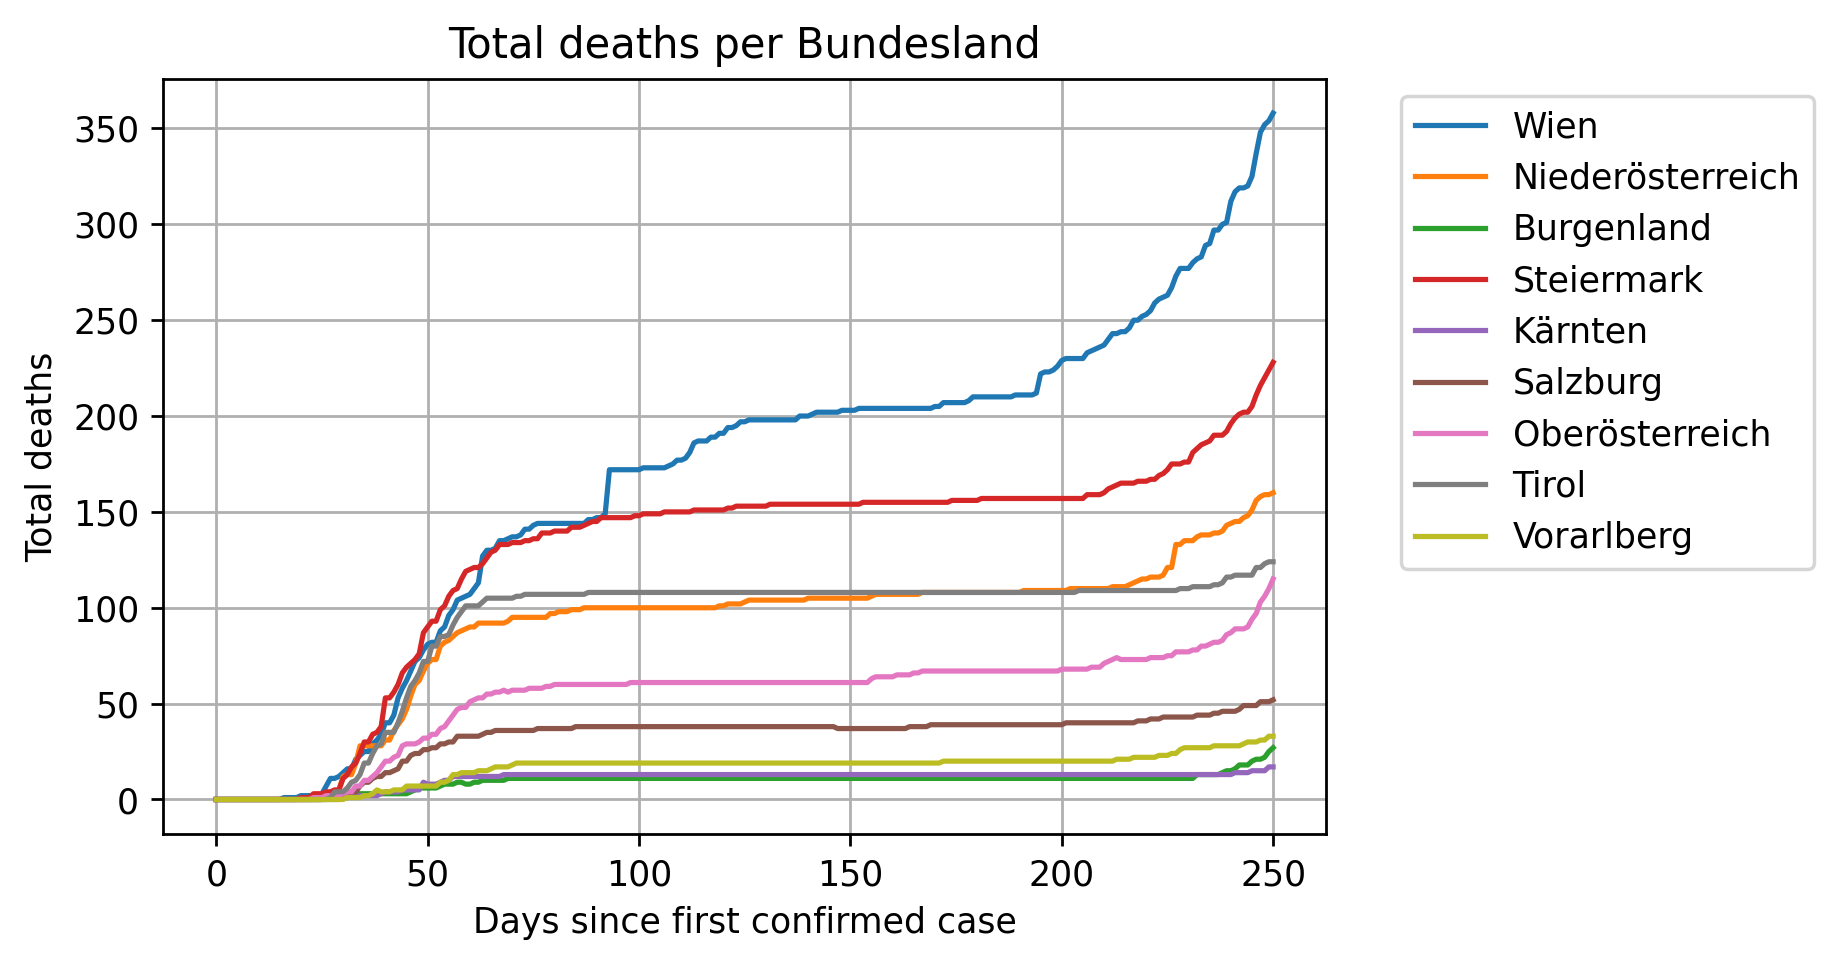

In [168]:
w,=plt.plot(df['Tage'],df['Wien_Tote'],label='Wien')
n,=plt.plot(df['Tage'],df['Niederösterreich_Tote'],label='Niederösterreich')
b,=plt.plot(df['Tage'],df['Burgenland_Tote'],label='Burgenland')
st,=plt.plot(df['Tage'],df['Steiermark_Tote'],label='Steiermark')
k,=plt.plot(df['Tage'],df['Kärnten_Tote'],label='Kärnten')
s,=plt.plot(df['Tage'],df['Salzburg_Tote'],label='Salzburg')
o,=plt.plot(df['Tage'],df['Oberösterreich_Tote'],label='Oberösterreich')
t,=plt.plot(df['Tage'],df['Tirol_Tote'],label='Tirol')
v,=plt.plot(df['Tage'],df['Vorarlberg_Tote'],label='Vorarlberg')
 
plt.title('Total deaths per Bundesland')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Total deaths')
plt.grid(which='both',axis='both') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
 

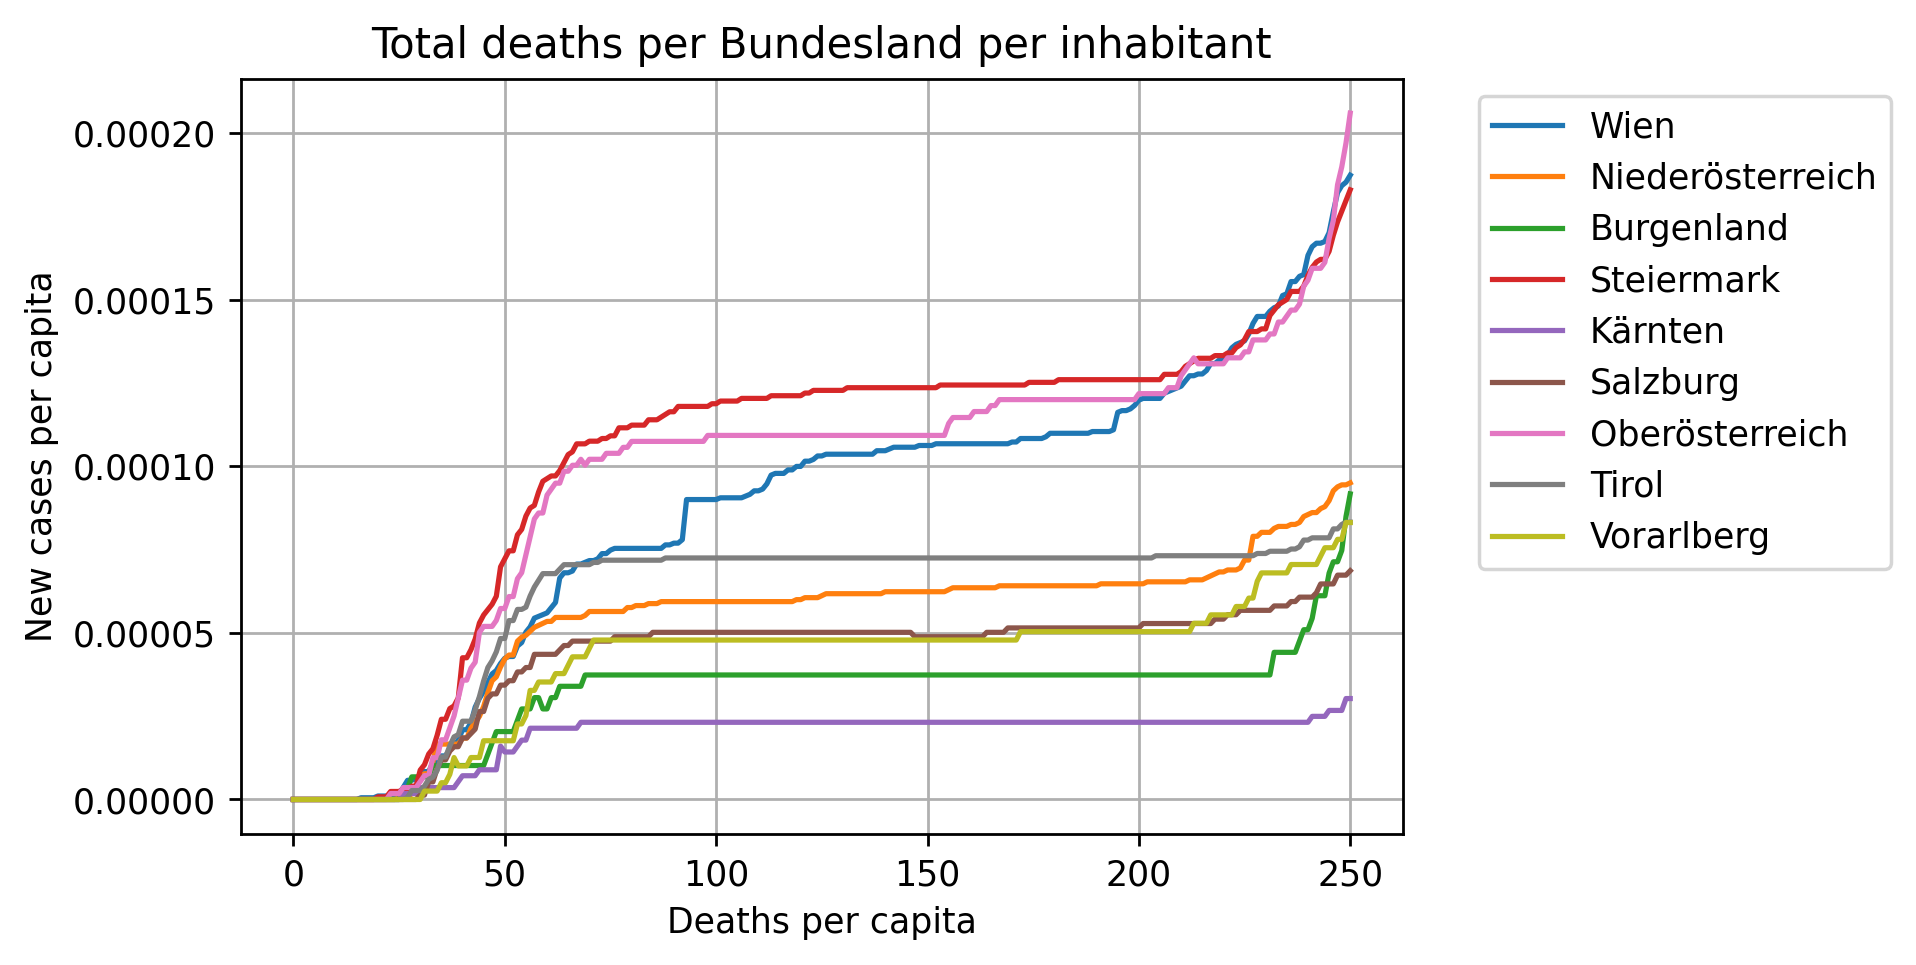

In [169]:
w,=plt.plot(df['Tage'],df['Wien_Tote']/population[0],label='Wien')
n,=plt.plot(df['Tage'],df['Niederösterreich_Tote']/population[1],label='Niederösterreich')
b,=plt.plot(df['Tage'],df['Burgenland_Tote']/population[2],label='Burgenland')
st,=plt.plot(df['Tage'],df['Steiermark_Tote']/population[3],label='Steiermark')
k,=plt.plot(df['Tage'],df['Kärnten_Tote']/population[4],label='Kärnten')
s,=plt.plot(df['Tage'],df['Salzburg_Tote']/population[5],label='Salzburg')
o,=plt.plot(df['Tage'],df['Oberösterreich_Tote']/population[6],label='Oberösterreich')
t,=plt.plot(df['Tage'],df['Tirol_Tote']/population[7],label='Tirol')
v,=plt.plot(df['Tage'],df['Vorarlberg_Tote']/population[8],label='Vorarlberg')
 
plt.title('Mortality per inhabitant per Bundesland')
plt.xlabel('Deaths per capita')
plt.ylabel('Mortality per inhabitant')
plt.grid(which='both',axis='both') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
 

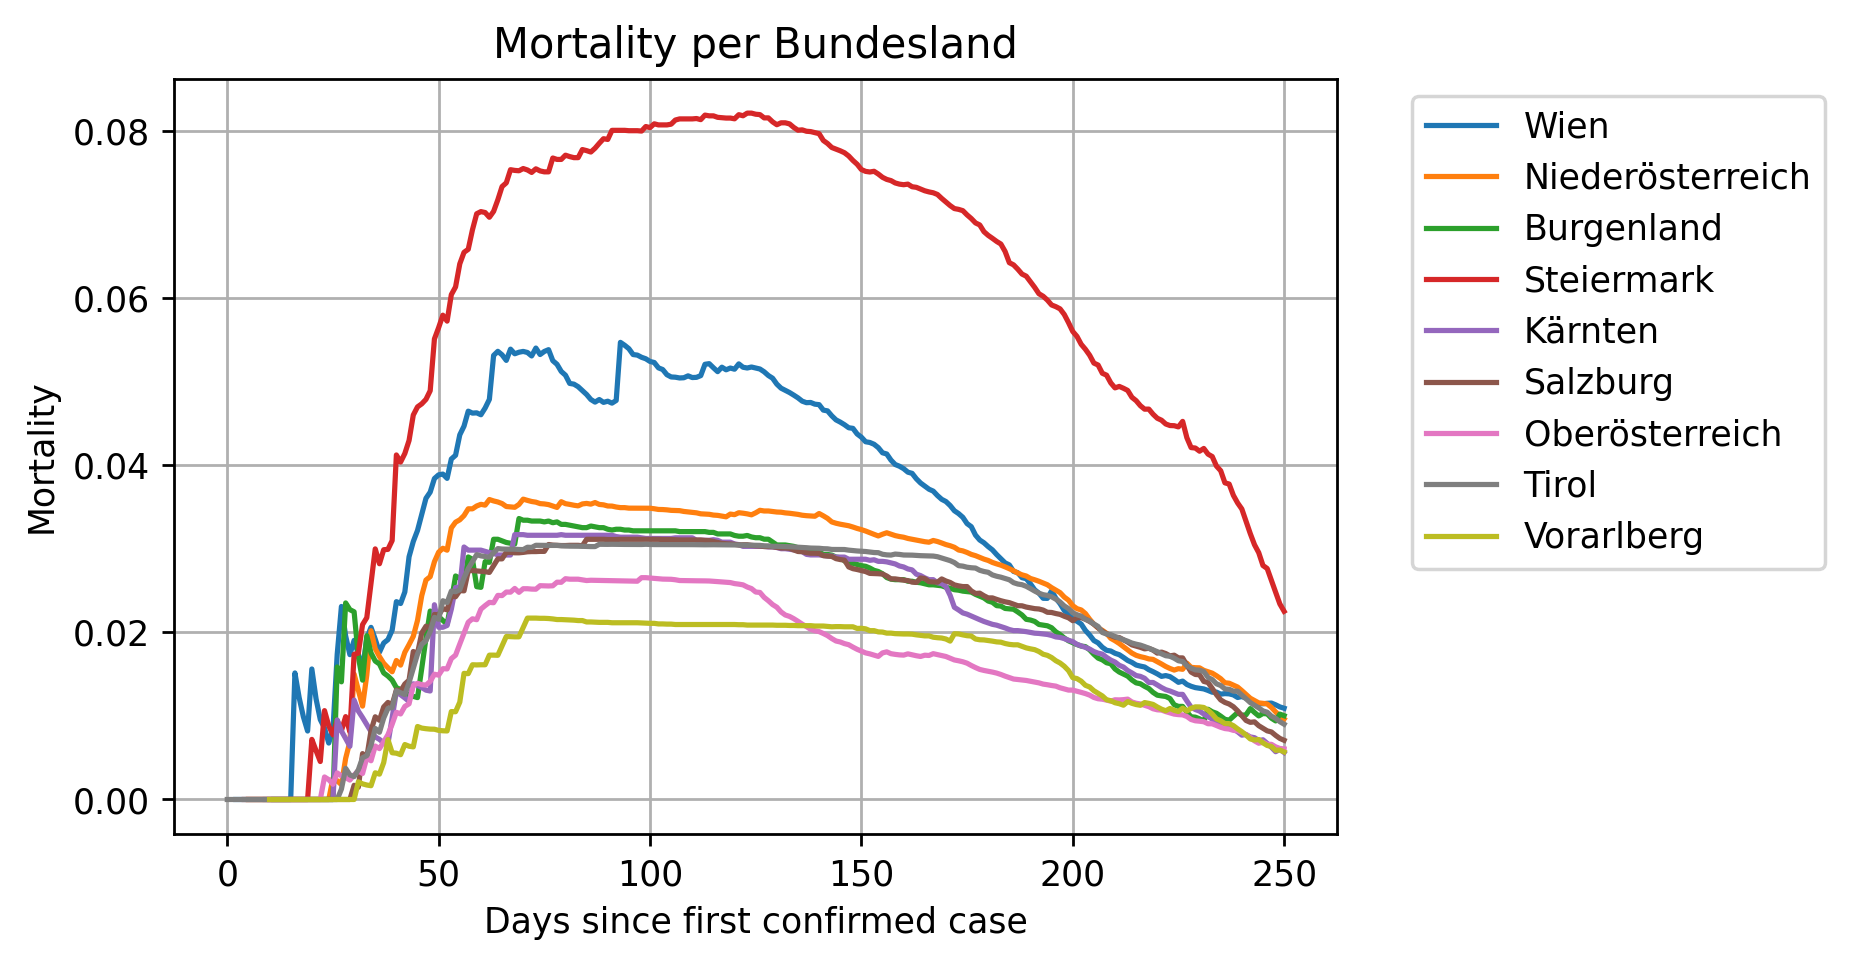

In [172]:
w,=plt.plot(df['Tage'],df['Wien_Tote']/df['Wien'],label='Wien')
n,=plt.plot(df['Tage'],df['Niederösterreich_Tote']/df['Niederösterreich'],label='Niederösterreich')
b,=plt.plot(df['Tage'],df['Burgenland_Tote']/df['Burgenland'],label='Burgenland')
st,=plt.plot(df['Tage'],df['Steiermark_Tote']/df['Steiermark'],label='Steiermark')
k,=plt.plot(df['Tage'],df['Kärnten_Tote']/df['Kärnten'],label='Kärnten')
s,=plt.plot(df['Tage'],df['Salzburg_Tote']/df['Salzburg'],label='Salzburg')
o,=plt.plot(df['Tage'],df['Oberösterreich_Tote']/df['Oberösterreich'],label='Oberösterreich')
t,=plt.plot(df['Tage'],df['Tirol_Tote']/df['Tirol'],label='Tirol')
v,=plt.plot(df['Tage'],df['Vorarlberg_Tote']/df['Vorarlberg'],label='Vorarlberg')
 
plt.title('Mortality per Bundesland')
plt.xlabel('Days since first confirmed case')
plt.ylabel('Mortality')
plt.grid(which='both',axis='both') 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
 